In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn import linear_model
lin=linear_model.LinearRegression()
from sklearn import metrics
from sklearn.linear_model import Lasso
lasso=Lasso()
from sklearn.linear_model import Ridge
rd=Ridge()
import random
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
from xgboost import XGBRegressor
xgbr=XGBRegressor()

In [2]:
data=pd.read_csv(r"C:\Users\HP\Documents\ml project\Property_Price_Train.csv")
data

Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type  \
0        1              60          RLD        65.0      8450     Paved   
1        2              20          RLD        80.0      9600     Paved   
2        3              60          RLD        68.0     11250     Paved   
3        4              70          RLD        60.0      9550     Paved   
4        5              60          RLD        84.0     14260     Paved   
...    ...             ...          ...         ...       ...       ...   
1454  1455              20          FVR        62.0      7500     Paved   
1455  1456              60          RLD        62.0      7917     Paved   
1456  1457              20          RLD        85.0     13175     Paved   
1457  1458              70          RLD        66.0      9042     Paved   
1458  1459              20          RLD        68.0      9717     Paved   

     Lane_Type Property_Shape Land_Outline Utility_Type  ... Pool_Area  \
0          NaN            Reg          Lvl       AllPub  ...         0   
1          NaN            Reg          Lvl       AllPub  ...         0   
2          NaN            IR1          Lvl       AllPub  ...         0   
3          NaN            IR1          Lvl       AllPub  ...         0   
4          NaN            IR1          Lvl       AllPub  ...         0   
...        ...            ...          ...          ...  ...       ...   
1454     Paved            Reg          Lvl       AllPub  ...         0   
1455       NaN            Reg          Lvl       AllPub  ...         0   
1456       NaN            Reg          Lvl       AllPub  ...         0   
1457       NaN            Reg          Lvl       AllPub  ...         0   
1458       NaN            Reg          Lvl       AllPub  ...         0   

     Pool_Quality Fence_Quality Miscellaneous_Feature Miscellaneous_Value  \
0             NaN           NaN                   NaN                   0   
1             NaN           NaN                   NaN                   0   
2             NaN           NaN                   NaN                   0   
3             NaN           NaN                   NaN                   0   
4             NaN           NaN                   NaN                   0   
...           ...           ...                   ...                 ...   
1454          NaN           NaN                   NaN                   0   
1455          NaN           NaN                   NaN                   0   
1456          NaN         MnPrv                   NaN                   0   
1457          NaN         GdPrv                  Shed                2500   
1458          NaN           NaN                   NaN                   0   

     Month_Sold Year_Sold  Sale_Type  Sale_Condition  Sale_Price  
0             2      2008         WD          Normal      208500  
1             5      2007         WD          Normal      181500  
2             9      2008         WD          Normal      223500  
3             2      2006         WD         Abnorml      140000  
4            12      2008         WD          Normal      250000  
...         ...       ...        ...             ...         ...  
1454         10      2009         WD          Normal      185000  
1455          8      2007         WD          Normal      175000  
1456          2      2010         WD          Normal      210000  
1457          5      2010         WD          Normal      266500  
1458          4      2010         WD          Normal      142125  

[1459 rows x 81 columns]

In [3]:
data1=pd.read_csv(r"C:\Users\HP\Documents\ml project\Property_Price_Test.csv")
data1

Id  Building_Class Zoning_Class  Lot_Extent      Lot_Size Road_Type  \
0     1461              20          RHD        80.0  16104.819760     Paved   
1     1462              20          RLD        81.0  15639.150810     Paved   
2     1463              60          RLD        74.0   3849.428920     Paved   
3     1464              60          RLD        78.0   4955.447942     Paved   
4     1465             120          RLD        43.0   3046.604942     Paved   
...    ...             ...          ...         ...           ...       ...   
1454  2915             160          RMD        21.0  14584.838440     Paved   
1455  2916             160          RMD        21.0   8072.991379     Paved   
1456  2917              20          RLD       160.0   7367.775348     Paved   
1457  2918              85          RLD        62.0   2203.135444     Paved   
1458  2919              60          RLD        74.0   6253.431852     Paved   

     Lane_Type Property_Shape Land_Outline Utility_Type  ...  \
0          NaN            Reg          Lvl       AllPub  ...   
1          NaN            IR1          Lvl       AllPub  ...   
2          NaN            IR1          Lvl       AllPub  ...   
3          NaN            IR1          Lvl       AllPub  ...   
4          NaN            IR1          HLS       AllPub  ...   
...        ...            ...          ...          ...  ...   
1454       NaN            Reg          Lvl       AllPub  ...   
1455       NaN            Reg          Lvl       AllPub  ...   
1456       NaN            Reg          Lvl       AllPub  ...   
1457       NaN            Reg          Lvl       AllPub  ...   
1458       NaN            Reg          Lvl       AllPub  ...   

     Screen_Lobby_Area Pool_Area Pool_Quality Fence_Quality  \
0                  120         0          NaN         MnPrv   
1                    0         0          NaN           NaN   
2                    0         0          NaN         MnPrv   
3                    0         0          NaN           NaN   
4                  144         0          NaN           NaN   
...                ...       ...          ...           ...   
1454                 0         0          NaN           NaN   
1455                 0         0          NaN           NaN   
1456                 0         0          NaN           NaN   
1457                 0         0          NaN         MnPrv   
1458                 0         0          NaN           NaN   

     Miscellaneous_Feature Miscellaneous_Value Month_Sold  Year_Sold  \
0                      NaN                   0          6       2010   
1                     Gar2               12500          6       2010   
2                      NaN                   0          3       2010   
3                      NaN                   0          6       2010   
4                      NaN                   0          1       2010   
...                    ...                 ...        ...        ...   
1454                   NaN                   0          6       2006   
1455                   NaN                   0          4       2006   
1456                   NaN                   0          9       2006   
1457                  Shed                 700          7       2006   
1458                   NaN                   0         11       2006   

      Sale_Type  Sale_Condition  
0            WD          Normal  
1            WD          Normal  
2            WD          Normal  
3            WD          Normal  
4            WD          Normal  
...         ...             ...  
1454         WD         NoRMDal  
1455         WD        AbnoRMDl  
1456         WD         Abnorml  
1457         WD          Normal  
1458         WD          Normal  

[1459 rows x 80 columns]

In [4]:
data.shape,data1.shape

((1459, 81), (1459, 80))

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data1.drop_duplicates(inplace=True)

In [7]:
#data.head()

In [8]:
#data1.head()

In [9]:
#data.tail()

In [10]:
#data1.tail()

In [11]:
data.describe()

Id  Building_Class   Lot_Extent       Lot_Size  \
count  1459.000000     1459.000000  1200.000000    1459.000000   
mean    730.000000       56.922550    70.045833   10517.225497   
std     421.321334       42.304033    24.294456    9984.675721   
min       1.000000       20.000000    21.000000    1300.000000   
25%     365.500000       20.000000    59.000000    7549.000000   
50%     730.000000       50.000000    69.000000    9477.000000   
75%    1094.500000       70.000000    80.000000   11603.000000   
max    1459.000000      190.000000   313.000000  215245.000000   

       Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
count       1459.000000      1459.000000        1459.000000   1459.000000   
mean           6.100069         5.575051        1971.272104   1984.879369   
std            1.383171         1.113125          30.212814     20.645927   
min            1.000000         1.000000        1872.000000   1950.000000   
25%            5.000000         5.000000        1954.000000   1967.000000   
50%            6.000000         5.000000        1973.000000   1994.000000   
75%            7.000000         6.000000        2000.000000   2004.000000   
max           10.000000         9.000000        2010.000000   2010.000000   

       Brick_Veneer_Area   BsmtFinSF1  ...  W_Deck_Area  Open_Lobby_Area  \
count         1451.00000  1459.000000  ...  1459.000000      1459.000000   
mean           103.75672   443.374914  ...    93.015667        47.811902   
std            181.10815   456.142186  ...   124.796682        67.467586   
min              0.00000     0.000000  ...  -338.112031      -187.149958   
25%              0.00000     0.000000  ...     9.656026         1.843186   
50%              0.00000   383.000000  ...    92.803628        46.837919   
75%            166.00000   712.000000  ...   180.335986        96.523486   
max           1600.00000  5644.000000  ...   572.298709       255.362547   

       Enclosed_Lobby_Area  Three_Season_Lobby_Area  Screen_Lobby_Area  \
count          1459.000000              1459.000000        1459.000000   
mean             24.580227                 3.411926          15.071282   
std              61.353507                29.327247          55.775138   
min            -164.807386                 0.000000           0.000000   
25%             -16.807302                 0.000000           0.000000   
50%              25.026953                 0.000000           0.000000   
75%              66.237591                 0.000000           0.000000   
max             225.762714               508.000000         480.000000   

         Pool_Area  Miscellaneous_Value   Month_Sold    Year_Sold  \
count  1459.000000          1459.000000  1459.000000  1459.000000   
mean      2.760795            43.518849     6.322138  2007.815627   
std      40.191018           496.291826     2.704540     1.328542   
min       0.000000             0.000000     1.000000  2006.000000   
25%       0.000000             0.000000     5.000000  2007.000000   
50%       0.000000             0.000000     6.000000  2008.000000   
75%       0.000000             0.000000     8.000000  2009.000000   
max     738.000000         15500.000000    12.000000  2010.000000   

          Sale_Price  
count    1459.000000  
mean   180944.102810  
std     79464.918335  
min     34900.000000  
25%    129950.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [12]:
data1.describe()

Id  Building_Class   Lot_Extent      Lot_Size  \
count  1459.000000     1459.000000  1232.000000   1459.000000   
mean   2190.000000       57.378341    68.580357   9872.044418   
std     421.321334       42.746880    22.376841   4960.234751   
min    1461.000000       20.000000    21.000000  -4265.104479   
25%    1825.500000       20.000000    58.000000   6351.984222   
50%    2190.000000       50.000000    67.000000   9784.907361   
75%    2554.500000       70.000000    80.000000  13208.971525   
max    2919.000000      190.000000   200.000000  26126.190300   

       Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
count       1459.000000      1459.000000        1459.000000   1459.000000   
mean           6.078821         5.553804        1971.357779   1983.662783   
std            1.436812         1.113740          30.390071     21.130467   
min            1.000000         1.000000        1879.000000   1950.000000   
25%            5.000000         5.000000        1953.000000   1963.000000   
50%            6.000000         5.000000        1973.000000   1992.000000   
75%            7.000000         6.000000        2001.000000   2004.000000   
max           10.000000         9.000000        2010.000000   2010.000000   

       Brick_Veneer_Area   BsmtFinSF1  ...  Garage_Area  W_Deck_Area  \
count        1444.000000  1458.000000  ...  1458.000000  1459.000000   
mean          100.709141   439.203704  ...   472.768861    93.174777   
std           177.625900   455.268042  ...   217.048611   127.744882   
min             0.000000     0.000000  ...     0.000000     0.000000   
25%             0.000000     0.000000  ...   318.000000     0.000000   
50%             0.000000   350.500000  ...   480.000000     0.000000   
75%           164.000000   753.500000  ...   576.000000   168.000000   
max          1290.000000  4010.000000  ...  1488.000000  1424.000000   

       Open_Lobby_Area  Enclosed_Lobby_Area  Three_Season_Lobby_Area  \
count      1459.000000          1459.000000              1459.000000   
mean         48.313914            24.243317                 1.794380   
std          68.883364            67.227765                20.207842   
min           0.000000             0.000000                 0.000000   
25%           0.000000             0.000000                 0.000000   
50%          28.000000             0.000000                 0.000000   
75%          72.000000             0.000000                 0.000000   
max         742.000000          1012.000000               360.000000   

       Screen_Lobby_Area    Pool_Area  Miscellaneous_Value   Month_Sold  \
count        1459.000000  1459.000000          1459.000000  1459.000000   
mean           17.064428     1.744345            58.167923     6.104181   
std            56.609763    30.491646           630.806978     2.722432   
min             0.000000     0.000000             0.000000     1.000000   
25%             0.000000     0.000000             0.000000     4.000000   
50%             0.000000     0.000000             0.000000     6.000000   
75%             0.000000     0.000000             0.000000     8.000000   
max           576.000000   800.000000         17000.000000    12.000000   

         Year_Sold  
count  1459.000000  
mean   2007.769705  
std       1.301740  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 37 columns]

In [13]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [14]:
data.describe(include="all")

Id  Building_Class Zoning_Class   Lot_Extent       Lot_Size  \
count   1459.000000     1459.000000         1459  1200.000000    1459.000000   
unique          NaN             NaN            5          NaN            NaN   
top             NaN             NaN          RLD          NaN            NaN   
freq            NaN             NaN         1150          NaN            NaN   
mean     730.000000       56.922550          NaN    70.045833   10517.225497   
std      421.321334       42.304033          NaN    24.294456    9984.675721   
min        1.000000       20.000000          NaN    21.000000    1300.000000   
25%      365.500000       20.000000          NaN    59.000000    7549.000000   
50%      730.000000       50.000000          NaN    69.000000    9477.000000   
75%     1094.500000       70.000000          NaN    80.000000   11603.000000   
max     1459.000000      190.000000          NaN   313.000000  215245.000000   

       Road_Type Lane_Type Property_Shape Land_Outline Utility_Type  \
count       1459        91           1459         1459         1459   
unique         2         2              4            4            2   
top        Paved      Grvl            Reg          Lvl       AllPub   
freq        1453        50            924         1310         1458   
mean         NaN       NaN            NaN          NaN          NaN   
std          NaN       NaN            NaN          NaN          NaN   
min          NaN       NaN            NaN          NaN          NaN   
25%          NaN       NaN            NaN          NaN          NaN   
50%          NaN       NaN            NaN          NaN          NaN   
75%          NaN       NaN            NaN          NaN          NaN   
max          NaN       NaN            NaN          NaN          NaN   

       Lot_Configuration Property_Slope Neighborhood Condition1 Condition2  \
count               1459           1459         1459       1459       1459   
unique                 5              3           25          9          8   
top                    I             GS        NAmes       Norm       Norm   
freq                1051           1381          225       1259       1444   
mean                 NaN            NaN          NaN        NaN        NaN   
std                  NaN            NaN          NaN        NaN        NaN   
min                  NaN            NaN          NaN        NaN        NaN   
25%                  NaN            NaN          NaN        NaN        NaN   
50%                  NaN            NaN          NaN        NaN        NaN   
75%                  NaN            NaN          NaN        NaN        NaN   
max                  NaN            NaN          NaN        NaN        NaN   

       House_Type House_Design  Overall_Material  House_Condition  \
count        1459         1459       1459.000000      1459.000000   
unique          5            8               NaN              NaN   
top          1Fam       1Story               NaN              NaN   
freq         1219          725               NaN              NaN   
mean          NaN          NaN          6.100069         5.575051   
std           NaN          NaN          1.383171         1.113125   
min           NaN          NaN          1.000000         1.000000   
25%           NaN          NaN          5.000000         5.000000   
50%           NaN          NaN          6.000000         5.000000   
75%           NaN          NaN          7.000000         6.000000   
max           NaN          NaN         10.000000         9.000000   

        Construction_Year  Remodel_Year Roof_Design Roof_Quality Exterior1st  \
count         1459.000000   1459.000000        1459         1459        1459   
unique                NaN           NaN           6            8          15   
top                   NaN           NaN       Gable           SS     VinylSd   
freq                  NaN           NaN        1140         1433         515   
mean          1971.272104   1984.8793

In [15]:
data1.describe(include="all")

Id  Building_Class Zoning_Class   Lot_Extent      Lot_Size  \
count   1459.000000     1459.000000         1455  1232.000000   1459.000000   
unique          NaN             NaN            5          NaN           NaN   
top             NaN             NaN          RLD          NaN           NaN   
freq            NaN             NaN         1114          NaN           NaN   
mean    2190.000000       57.378341          NaN    68.580357   9872.044418   
std      421.321334       42.746880          NaN    22.376841   4960.234751   
min     1461.000000       20.000000          NaN    21.000000  -4265.104479   
25%     1825.500000       20.000000          NaN    58.000000   6351.984222   
50%     2190.000000       50.000000          NaN    67.000000   9784.907361   
75%     2554.500000       70.000000          NaN    80.000000  13208.971525   
max     2919.000000      190.000000          NaN   200.000000  26126.190300   

       Road_Type Lane_Type Property_Shape Land_Outline Utility_Type  \
count       1459       107           1459         1459         1457   
unique         2         2              4            4            1   
top        Paved      Grvl            Reg          Lvl       AllPub   
freq        1453        70            934         1311         1457   
mean         NaN       NaN            NaN          NaN          NaN   
std          NaN       NaN            NaN          NaN          NaN   
min          NaN       NaN            NaN          NaN          NaN   
25%          NaN       NaN            NaN          NaN          NaN   
50%          NaN       NaN            NaN          NaN          NaN   
75%          NaN       NaN            NaN          NaN          NaN   
max          NaN       NaN            NaN          NaN          NaN   

       Lot_Configuration Property_Slope Neighborhood Condition1 Condition2  \
count               1459           1459         1459       1459       1459   
unique                 5              3           25         10          6   
top                    I             GS        NAmes       Norm       Norm   
freq                1081           1396          218       1045       1207   
mean                 NaN            NaN          NaN        NaN        NaN   
std                  NaN            NaN          NaN        NaN        NaN   
min                  NaN            NaN          NaN        NaN        NaN   
25%                  NaN            NaN          NaN        NaN        NaN   
50%                  NaN            NaN          NaN        NaN        NaN   
75%                  NaN            NaN          NaN        NaN        NaN   
max                  NaN            NaN          NaN        NaN        NaN   

       House_Type House_Design  Overall_Material  House_Condition  \
count        1459         1459       1459.000000      1459.000000   
unique          5            7               NaN              NaN   
top          1Fam       1Story               NaN              NaN   
freq         1205          745               NaN              NaN   
mean          NaN          NaN          6.078821         5.553804   
std           NaN          NaN          1.436812         1.113740   
min           NaN          NaN          1.000000         1.000000   
25%           NaN          NaN          5.000000         5.000000   
50%           NaN          NaN          6.000000         5.000000   
75%           NaN          NaN          7.000000         6.000000   
max           NaN          NaN         10.000000         9.000000   

        Construction_Year  Remodel_Year Roof_Design Roof_Quality Exterior1st  \
count         1459.000000   1459.000000        1459         1459        1458   
unique                NaN           NaN           6            4          13   
top                   NaN           NaN       Gable           SS     VinylSd   
freq                  NaN           NaN        1169         1442         510   
mean          1971.357779   1983.662783         N

# Preprocessing

In [16]:
data.isnull().sum()

Id                              0
Building_Class                  0
Zoning_Class                    0
Lot_Extent                    259
Lot_Size                        0
Road_Type                       0
Lane_Type                    1368
Property_Shape                  0
Land_Outline                    0
Utility_Type                    0
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     0
Exterior2nd                     0
Brick_Veneer_Type             871
Brick_Veneer_Area               8
Exterior_Material               0
Exterior_Condition              0
Foundation_Typ

In [17]:
data=data.drop(["Lane_Type"],axis=1)
data=data.drop(["Pool_Quality"],axis=1)
data=data.drop(["Fence_Quality"],axis=1)
data=data.drop(["Miscellaneous_Feature"],axis=1)
data=data.drop(["Brick_Veneer_Type"],axis=1)

In [18]:
#data.Lot_Extent.value_counts()

In [19]:
data.Lot_Extent=data.Lot_Extent.fillna(data.Lot_Extent.median())

In [20]:
data.Basement_Height.value_counts()

Basement_Height
TA    648
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [21]:
data.Basement_Height=data.Basement_Height.fillna("Fa")

In [22]:
data.Basement_Condition.value_counts()

Basement_Condition
TA    1310
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [23]:
data.Basement_Condition=data.Basement_Condition.fillna("Po")

In [24]:
data.Exposure_Level.value_counts()

Exposure_Level
No    952
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [25]:
data.Exposure_Level=data.Exposure_Level.fillna("Mn")

In [26]:
data.Electrical_System.value_counts()

Electrical_System
SBrkr    1333
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [27]:
data.Electrical_System=data.Electrical_System.fillna("Mix")

In [28]:
data.Fireplace_Quality.value_counts()

Fireplace_Quality
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [29]:
data.Fireplace_Quality=data.Fireplace_Quality.fillna("Po")

In [30]:
data.Garage.value_counts()

Garage
Attchd     869
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2TFes        5
2Types       1
Name: count, dtype: int64

In [31]:
data.Garage=data.Garage.fillna("2Types")

In [32]:
#data.Garage_Built_Year.value_counts()

In [33]:
data.Garage_Built_Year=data.Garage_Built_Year.fillna(data.Garage_Built_Year.median())

In [34]:
data.Garage_Finish_Year.value_counts()

Garage_Finish_Year
Unf    605
RFn    422
Fin    351
Name: count, dtype: int64

In [35]:
data.Garage_Finish_Year=data.Garage_Finish_Year.fillna("Fin")

In [36]:
data.Garage_Quality.value_counts()

Garage_Quality
TA    1310
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [37]:
data.Garage_Quality=data.Garage_Quality.fillna("Po")

In [38]:
data.Garage_Condition.value_counts()

Garage_Condition
TA    1325
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [39]:
data.Garage_Condition=data.Garage_Condition.fillna("Ex")

In [40]:
#data.Brick_Veneer_Area.value_counts()

In [41]:
data.Brick_Veneer_Area=data.Brick_Veneer_Area.fillna(data.Brick_Veneer_Area.median())

In [42]:
#data.describe(include="all")

In [43]:
data.BsmtFinType1.value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    147
Rec    133
LwQ     74
Name: count, dtype: int64

In [44]:
data.BsmtFinType1=data.BsmtFinType1.fillna("LwQ")

In [45]:
data.BsmtFinType2.value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      45
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [46]:
data.BsmtFinType2=data.BsmtFinType1.fillna("GLQ")

In [47]:
data.isnull().sum()

Id                           0
Building_Class               0
Zoning_Class                 0
Lot_Extent                   0
Lot_Size                     0
Road_Type                    0
Property_Shape               0
Land_Outline                 0
Utility_Type                 0
Lot_Configuration            0
Property_Slope               0
Neighborhood                 0
Condition1                   0
Condition2                   0
House_Type                   0
House_Design                 0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Roof_Design                  0
Roof_Quality                 0
Exterior1st                  0
Exterior2nd                  0
Brick_Veneer_Area            0
Exterior_Material            0
Exterior_Condition           0
Foundation_Type              0
Basement_Height              0
Basement_Condition           0
Exposure_Level               0
BsmtFinType1                 0
BsmtFinS

# Datatype Conversion

In [48]:
data.dtypes

Id                             int64
Building_Class                 int64
Zoning_Class                  object
Lot_Extent                   float64
Lot_Size                       int64
Road_Type                     object
Property_Shape                object
Land_Outline                  object
Utility_Type                  object
Lot_Configuration             object
Property_Slope                object
Neighborhood                  object
Condition1                    object
Condition2                    object
House_Type                    object
House_Design                  object
Overall_Material               int64
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
Roof_Design                   object
Roof_Quality                  object
Exterior1st                   object
Exterior2nd                   object
Brick_Veneer_Area            float64
Exterior_Material             object
Exterior_Condition            object
F

In [49]:
data.Zoning_Class=le.fit_transform(data.Zoning_Class)
data.Road_Type=le.fit_transform(data.Road_Type)
data.Property_Shape=le.fit_transform(data.Property_Shape)
data.Utility_Type=le.fit_transform(data.Utility_Type)
data.Lot_Configuration=le.fit_transform(data.Lot_Configuration)
data.Land_Outline=le.fit_transform(data.Land_Outline)
data.Neighborhood=le.fit_transform(data.Neighborhood)
data.BsmtFinType1=le.fit_transform(data.BsmtFinType1)
data.BsmtFinType2=le.fit_transform(data.BsmtFinType2)
data.Heating_Type=le.fit_transform(data.Heating_Type)
data.Heating_Quality=le.fit_transform(data.Heating_Quality)
data.Property_Slope=le.fit_transform(data.Property_Slope)
data.Condition1=le.fit_transform(data.Condition1)
data.Condition2=le.fit_transform(data.Condition2)
data.House_Type=le.fit_transform(data.House_Type)
data.House_Design=le.fit_transform(data.House_Design)
data.Roof_Design=le.fit_transform(data.Roof_Design)
data.Roof_Quality=le.fit_transform(data.Roof_Quality)
data.Exterior1st=le.fit_transform(data.Exterior1st)
data.Exterior2nd=le.fit_transform(data.Exterior2nd)
data.Exterior_Material=le.fit_transform(data.Exterior_Material)
data.Exterior_Condition=le.fit_transform(data.Exterior_Condition)
data.Foundation_Type=le.fit_transform(data.Foundation_Type)
data.Basement_Height=le.fit_transform(data.Basement_Height)
data.Basement_Condition=le.fit_transform(data.Basement_Condition)
data.Exposure_Level=le.fit_transform(data.Exposure_Level)
data.Air_Conditioning=le.fit_transform(data.Air_Conditioning)
data.Electrical_System=le.fit_transform(data.Electrical_System)
data.Kitchen_Quality=le.fit_transform(data.Kitchen_Quality)
data.Functional_Rate=le.fit_transform(data.Functional_Rate)
data.Fireplace_Quality=le.fit_transform(data.Fireplace_Quality)
data.Garage=le.fit_transform(data.Garage)
data.Garage_Quality=le.fit_transform(data.Garage_Quality)
data.Garage_Condition=le.fit_transform(data.Garage_Condition)
data.Pavedd_Drive=le.fit_transform(data.Pavedd_Drive)
data.Sale_Type=le.fit_transform(data.Sale_Type)
data.Sale_Condition=le.fit_transform(data.Sale_Condition)
data.Garage_Finish_Year=le.fit_transform(data.Garage_Finish_Year)

In [50]:
data.dtypes

Id                             int64
Building_Class                 int64
Zoning_Class                   int32
Lot_Extent                   float64
Lot_Size                       int64
Road_Type                      int32
Property_Shape                 int32
Land_Outline                   int32
Utility_Type                   int32
Lot_Configuration              int32
Property_Slope                 int32
Neighborhood                   int32
Condition1                     int32
Condition2                     int32
House_Type                     int32
House_Design                   int32
Overall_Material               int64
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
Roof_Design                    int32
Roof_Quality                   int32
Exterior1st                    int32
Exterior2nd                    int32
Brick_Veneer_Area            float64
Exterior_Material              int32
Exterior_Condition             int32
F

# Test data preprocessing

In [51]:
#data1.isnull().sum()

In [52]:
data1=data1.drop(["Lane_Type"],axis=1)
data1=data1.drop(["Pool_Quality"],axis=1)
data1=data1.drop(["Fence_Quality"],axis=1)
data1=data1.drop(["Miscellaneous_Feature"],axis=1)
data1=data1.drop(["Brick_Veneer_Type"],axis=1)

In [53]:
data1.Zoning_Class.value_counts()

Zoning_Class
RLD       1114
RMD        242
FVR         74
Commer      15
RHD         10
Name: count, dtype: int64

In [54]:
data1.Zoning_Class=data1.Zoning_Class.fillna("RHD")

In [55]:
#data1.Lot_Extent.value_counts()

In [56]:
data1.Lot_Extent=data1.Lot_Extent.fillna(data1.Lot_Extent.median())

In [57]:
data1.Utility_Type.value_counts()

Utility_Type
AllPub    1457
Name: count, dtype: int64

In [58]:
data1.Utility_Type=data1.Utility_Type.fillna("AllPub")

In [59]:
data1.Exterior1st.value_counts()

Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CB           1
Name: count, dtype: int64

In [60]:
data1.Exterior1st=data1.Exterior1st.fillna("CB")

In [61]:
data1.Exterior2nd.value_counts()

Exterior2nd
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: count, dtype: int64

In [62]:
data1.Exterior2nd=data1.Exterior2nd.fillna("Stone")

In [63]:
data1.Brick_Veneer_Area.value_counts()

Brick_Veneer_Area
0.0       877
176.0      10
144.0       9
120.0       8
216.0       8
200.0       7
302.0       6
504.0       6
198.0       6
128.0       6
60.0        5
210.0       5
203.0       5
260.0       5
140.0       5
196.0       5
164.0       5
256.0       5
180.0       4
174.0       4
20.0        4
16.0        4
186.0       4
44.0        4
194.0       4
240.0       4
112.0       4
232.0       4
178.0       4
50.0        4
340.0       4
40.0        4
88.0        4
150.0       4
306.0       4
143.0       4
242.0       4
23.0        4
420.0       4
450.0       3
68.0        3
190.0       3
108.0       3
270.0       3
130.0       3
145.0       3
513.0       3
52.0        3
182.0       3
206.0       3
456.0       3
76.0        3
132.0       3
280.0       3
252.0       3
264.0       3
126.0       3
90.0        3
96.0        3
162.0       3
170.0       3
32.0        3
80.0        3
248.0       3
172.0       3
98.0        3
72.0        3
14.0        3
300.0       3
218.0       2
56

In [64]:
data1.Brick_Veneer_Area=data1.Brick_Veneer_Area.fillna(data1.Brick_Veneer_Area.median())

In [65]:
data1.Basement_Height.value_counts()

Basement_Height
TA    634
Gd    591
Ex    137
Fa     53
Name: count, dtype: int64

In [66]:
data1.Basement_Height=data1.Basement_Height.fillna("Fa")

In [67]:
data1.Basement_Condition.value_counts()

Basement_Condition
TA    1295
Fa      59
Gd      57
Po       3
Name: count, dtype: int64

In [68]:
data1.Basement_Condition=data1.Basement_Condition.fillna("Po")

In [69]:
data1.Exposure_Level.value_counts()

Exposure_Level
No    951
Av    197
Gd    142
Mn    125
Name: count, dtype: int64

In [70]:
data1.Exposure_Level=data1.Exposure_Level.fillna("Mn")

In [71]:
#data1.Total_Basement_Area.value_counts()

In [72]:
data1.Total_Basement_Area=data1.Total_Basement_Area.fillna(data1.Total_Basement_Area.median())

In [73]:
data1.Underground_Full_Bathroom.value_counts()

Underground_Full_Bathroom
0.0    849
1.0    584
2.0     23
3.0      1
Name: count, dtype: int64

In [74]:
data1.Underground_Full_Bathroom=data1.Underground_Full_Bathroom.fillna(3.0)

In [75]:
data1.Underground_Half_Bathroom.value_counts()

Underground_Half_Bathroom
0.0    1364
1.0      91
2.0       2
Name: count, dtype: int64

In [76]:
data1.Underground_Half_Bathroom=data1.Underground_Half_Bathroom.fillna(2.0)

In [77]:
data1.Kitchen_Quality.value_counts()

Kitchen_Quality
TA    757
Gd    565
Ex    105
Fa     31
Name: count, dtype: int64

In [78]:
data1.Kitchen_Quality=data1.Kitchen_Quality.fillna("Fa")

In [79]:
data1.Functional_Rate.value_counts()

Functional_Rate
TF       1357
MD2        36
MD1        34
Mod        19
MajD1       5
MajD2       4
Sev         1
MS          1
Name: count, dtype: int64

In [80]:
data1.Functional_Rate=data1.Functional_Rate.fillna("MS")

In [81]:
data1.Fireplace_Quality.value_counts()

Fireplace_Quality
Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: count, dtype: int64

In [82]:
data1.Fireplace_Quality=data1.Fireplace_Quality.fillna("Ex")

In [83]:
data1.Garage.value_counts()

Garage
Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2TFes       10
2Types       7
CarPort      6
Name: count, dtype: int64

In [84]:
data1.Garage=data1.Garage.fillna("CarPort")

In [85]:
#data1.Garage_Built_Year.value_counts()

In [86]:
data1.Garage_Built_Year=data1.Garage_Built_Year.fillna(data1.Garage_Built_Year.median())

In [87]:
data1.Garage_Finish_Year.value_counts()

Garage_Finish_Year
Unf    625
RFn    389
Fin    367
Name: count, dtype: int64

In [88]:
data1.Garage_Finish_Year=data1.Garage_Finish_Year.fillna("Fin")

In [89]:
data1.Garage_Size.value_counts()

Garage_Size
2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: count, dtype: int64

In [90]:
data1.Garage_Size=data1.Garage_Size.fillna(5.0)

In [91]:
#data1.Garage_Area.value_counts()

In [92]:
data1.Garage_Area=data1.Garage_Area.fillna(data1.Garage_Area.median())

In [93]:
data1.Garage_Quality.value_counts()

Garage_Quality
TA    1293
Fa      76
Gd      10
Po       2
Name: count, dtype: int64

In [94]:
data1.Garage_Quality=data1.Garage_Quality.fillna("Po")

In [95]:
data1.Garage_Condition.value_counts()

Garage_Condition
TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: count, dtype: int64

In [96]:
data1.Garage_Condition=data1.Garage_Condition.fillna("Ex")

In [97]:
data1.Sale_Type.value_counts()

Sale_Type
WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: count, dtype: int64

In [98]:
data1.Sale_Type=data1.Sale_Type.fillna("ConLw")

In [99]:
data1.BsmtFinType1.value_counts()

BsmtFinType1
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: count, dtype: int64

In [100]:
data1.BsmtFinType1=data1.BsmtFinType1.fillna("LwQ")

In [101]:
#data1.BsmtFinSF1.value_counts()

In [102]:
data1.BsmtFinSF1=data1.BsmtFinSF1.fillna(data1.BsmtFinSF1.median())

In [103]:
data1.BsmtFinType2.value_counts()

BsmtFinType2
Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: count, dtype: int64

In [104]:
data1.BsmtFinType2=data1.BsmtFinType2.fillna("GLQ")

In [105]:
#data1.BsmtFinSF2.value_counts()

In [106]:
data1.BsmtFinSF2=data1.BsmtFinSF2.fillna(data1.BsmtFinSF2.median())

In [107]:
#data1.BsmtUnfSF.value_counts()

In [108]:
data1.BsmtUnfSF=data1.BsmtUnfSF.fillna(data1.BsmtUnfSF.median())

In [109]:
data1.isnull().sum()

Id                           0
Building_Class               0
Zoning_Class                 0
Lot_Extent                   0
Lot_Size                     0
Road_Type                    0
Property_Shape               0
Land_Outline                 0
Utility_Type                 0
Lot_Configuration            0
Property_Slope               0
Neighborhood                 0
Condition1                   0
Condition2                   0
House_Type                   0
House_Design                 0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Roof_Design                  0
Roof_Quality                 0
Exterior1st                  0
Exterior2nd                  0
Brick_Veneer_Area            0
Exterior_Material            0
Exterior_Condition           0
Foundation_Type              0
Basement_Height              0
Basement_Condition           0
Exposure_Level               0
BsmtFinType1                 0
BsmtFinS

# Test data - Datatype conversion

In [110]:
data1.dtypes

Id                             int64
Building_Class                 int64
Zoning_Class                  object
Lot_Extent                   float64
Lot_Size                     float64
Road_Type                     object
Property_Shape                object
Land_Outline                  object
Utility_Type                  object
Lot_Configuration             object
Property_Slope                object
Neighborhood                  object
Condition1                    object
Condition2                    object
House_Type                    object
House_Design                  object
Overall_Material               int64
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
Roof_Design                   object
Roof_Quality                  object
Exterior1st                   object
Exterior2nd                   object
Brick_Veneer_Area            float64
Exterior_Material             object
Exterior_Condition            object
F

In [111]:
data1.Zoning_Class=le.fit_transform(data1.Zoning_Class)
data1.Road_Type=le.fit_transform(data1.Road_Type)
data1.Property_Shape=le.fit_transform(data1.Property_Shape)
data1.Utility_Type=le.fit_transform(data1.Utility_Type)
data1.Lot_Configuration=le.fit_transform(data1.Lot_Configuration)
data1.Property_Slope=le.fit_transform(data1.Property_Slope)
data1.Condition1=le.fit_transform(data1.Condition1)
data1.Condition2=le.fit_transform(data1.Condition2)
data1.House_Type=le.fit_transform(data1.House_Type)
data1.House_Design=le.fit_transform(data1.House_Design)
data1.Roof_Design=le.fit_transform(data1.Roof_Design)
data1.Roof_Quality=le.fit_transform(data1.Roof_Quality)
data1.Exterior1st=le.fit_transform(data1.Exterior1st)
data1.Exterior2nd=le.fit_transform(data1.Exterior2nd)
data1.Exterior_Material=le.fit_transform(data1.Exterior_Material)
data1.Exterior_Condition=le.fit_transform(data1.Exterior_Condition)
data1.Foundation_Type=le.fit_transform(data1.Foundation_Type)
data1.Basement_Height=le.fit_transform(data1.Basement_Height)
data1.Basement_Condition=le.fit_transform(data1.Basement_Condition)
data1.Exposure_Level=le.fit_transform(data1.Exposure_Level)
data1.Air_Conditioning=le.fit_transform(data1.Air_Conditioning)
data1.Electrical_System=le.fit_transform(data1.Electrical_System)
data1.Kitchen_Quality=le.fit_transform(data1.Kitchen_Quality)
data1.Functional_Rate=le.fit_transform(data1.Functional_Rate)
data1.Fireplace_Quality=le.fit_transform(data1.Fireplace_Quality)
data1.Garage=le.fit_transform(data1.Garage)
data1.Garage_Quality=le.fit_transform(data1.Garage_Quality)
data1.Garage_Condition=le.fit_transform(data1.Garage_Condition)
data1.Pavedd_Drive=le.fit_transform(data1.Pavedd_Drive)
data1.Sale_Type=le.fit_transform(data1.Sale_Type)
data1.Sale_Condition=le.fit_transform(data1.Sale_Condition)
data1.Garage_Finish_Year=le.fit_transform(data1.Garage_Finish_Year)


data1.Land_Outline=le.fit_transform(data1.Land_Outline)
data1.Neighborhood=le.fit_transform(data1.Neighborhood)
data1.BsmtFinType1=le.fit_transform(data1.BsmtFinType1)
data1.BsmtFinType2=le.fit_transform(data1.BsmtFinType2)

data1.Heating_Type=le.fit_transform(data1.Heating_Type)
data1.Heating_Quality=le.fit_transform(data1.Heating_Quality)


In [112]:
data1.dtypes

Id                             int64
Building_Class                 int64
Zoning_Class                   int32
Lot_Extent                   float64
Lot_Size                     float64
Road_Type                      int32
Property_Shape                 int32
Land_Outline                   int32
Utility_Type                   int32
Lot_Configuration              int32
Property_Slope                 int32
Neighborhood                   int32
Condition1                     int32
Condition2                     int32
House_Type                     int32
House_Design                   int32
Overall_Material               int64
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
Roof_Design                    int32
Roof_Quality                   int32
Exterior1st                    int32
Exterior2nd                    int32
Brick_Veneer_Area            float64
Exterior_Material              int32
Exterior_Condition             int32
F

In [113]:
data.shape,data1.shape

((1459, 76), (1459, 75))

# Visualisation

<Axes: xlabel='Sale_Price', ylabel='Count'>

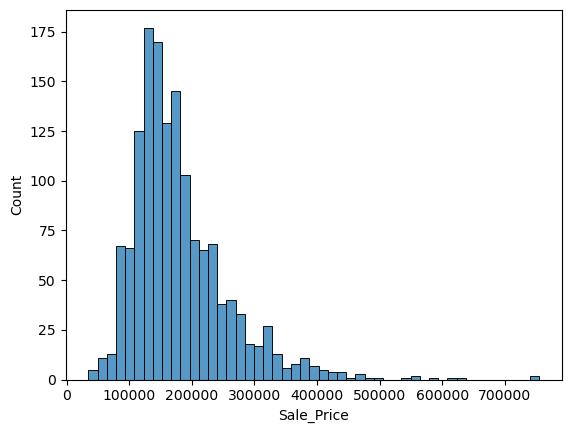

In [114]:
sns.histplot(x='Sale_Price',data=data)

In [115]:
# This graph shows histogram of 'Sale Prices' which indicates frequency of different price ranges.

<Axes: xlabel='Sale_Price', ylabel='Lot_Size'>

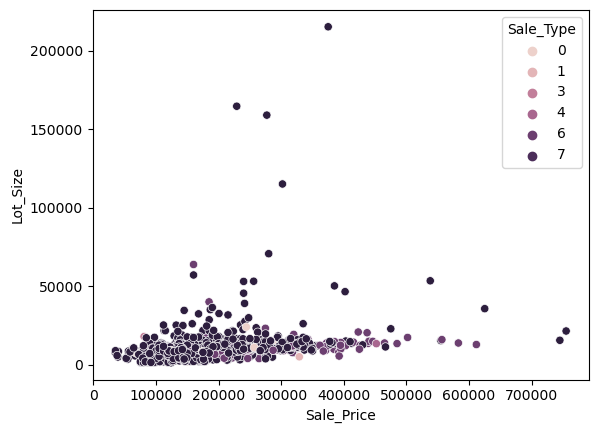

In [116]:
sns.scatterplot(x="Sale_Price",y="Lot_Size",hue='Sale_Type',sizes=(50,200),data=data)

In [117]:
# This is scatter plot which shows the relationship between property sale prices and lot sizes, 
# with the additional distinction of different sale types represented by colors

<Axes: xlabel='Sale_Price', ylabel='Density'>

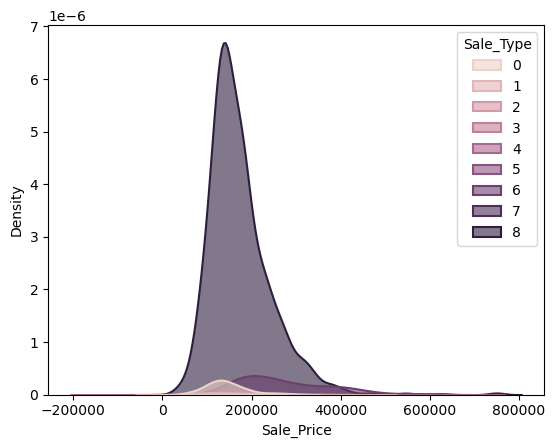

In [118]:
sns.kdeplot(data=data,x="Sale_Price",hue='Sale_Type',fill=True,alpha=0.6,linewidth=1.5)

In [119]:
# This plot is kernel density estimation plot that shows distribution of sale prices across different sale type.

# Model Building

In [120]:
#c=data.corr()

In [121]:
#plt.figure(figsize=(15,12))#adjust width and height as needed
#heatmap=sns.heatmap(c,linewidth=1, annot=True,cmap=plt.cm.Blues, annot_kws={"fontsize":6})
#plt.yticks(rotation=0) # rotate y axis labels to horizontal
#plt.xticks(rotation=45)# rotate x axis labels to 45 degrees
#plt.show()

In [122]:
data.drop(["Id"],axis=1)

Building_Class  Zoning_Class  Lot_Extent  Lot_Size  Road_Type  \
0                 60             3        65.0      8450          1   
1                 20             3        80.0      9600          1   
2                 60             3        68.0     11250          1   
3                 70             3        60.0      9550          1   
4                 60             3        84.0     14260          1   
5                 50             3        85.0     14115          1   
6                 20             3        75.0     10084          1   
7                 60             3        69.0     10382          1   
8                 50             4        51.0      6120          1   
9                190             3        50.0      7420          1   
10                20             3        70.0     11200          1   
11                60             3        85.0     11924          1   
12                20             3        69.0     12968          1   
13                20             3        91.0     10652          1   
14                20             3        69.0     10920          1   
15                45             4        51.0      6120          1   
16                20             3        69.0     11241          1   
17                90             3        72.0     10791          1   
18                20             3        66.0     13695          1   
19                20             3        70.0      7560          1   
20                60             3       101.0     14215          1   
21                45             4        57.0      7449          1   
22                20             3        75.0      9742          1   
23               120             4        44.0      4224          1   
24                20             3        69.0      8246          1   
25                20             3       110.0     14230          1   
26                20             3        60.0      7200          1   
27                20             3        98.0     11478          1   
28                20             3        47.0     16321          1   
29                30             4        60.0      6324          1   
30                70             0        50.0      8500          1   
31                20             3        69.0      8544          1   
32                20             3        85.0     11049          1   
33                20             3        70.0     10552          1   
34               120             3        60.0      7313          1   
35                60             3       108.0     13418          1   
36                20             3       112.0     10859          1   
37                20             3        74.0      8532          1   
38                20             3        68.0      7922          1   
39                90             3        65.0      6040          1   
40                20             3        84.0      8658          1   
41                20             3       115.0     16905          1   
42                85             3        69.0      9180          1   
43                20             3        69.0      9200          1   
44                20             3        70.0      7945          1   
45               120             3        61.0      7658          1   
46                50             3        48.0     12822          1   
47                20             1        84.0     11096          1   
48               190             4        33.0      4456          1   
49                20             3        66.0      7742          1   
50                60             3        69.0     13869          1   
51                50             4        52.0      6240          1   
52                90             4       110.0      8472          0   
53                20             3        68.0     50271          1   
54                80             3        60.0      7134          1   
55                20          

In [123]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [124]:
bx_train,bx_test,by_train,by_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [125]:
bx_train.shape,bx_test.shape,by_train.shape,by_test.shape

((1167, 75), (292, 75), (1167,), (292,))

# Linear regression

In [126]:
lin.fit(bx_train,by_train)

LinearRegression()

In [127]:
p1=lin.predict(bx_test)
#p1

In [128]:
lin.intercept_

196480.01774004695

In [129]:
#lin.coef_

In [130]:
r2=lin.score(bx_train,by_train)
r2

0.8768760064547937

In [131]:
adj_r2=1-(((1-r2)*(1167-1))/(1167-75-1))
adj_r2

0.8684119372376622

In [132]:
mse=metrics.mean_squared_error(by_test,p1)
mse

2157554905.5557265

In [133]:
rmse=pow(mse,0.5)
rmse

46449.487678075915

In [134]:
df1=pd.DataFrame({"Actual":by_test,"Predicted":p1})
df1

Actual      Predicted
666   129000  212601.466001
104   169500  179844.521179
528    86000   68071.562940
18    159000  148053.497423
1151  149900  169927.844480
60    158000  178829.344594
70    244000  334205.984823
284   179200  187893.830599
860   189950  169367.733605
327   145250  153278.837490
786   139000  156677.897364
191   184000  195012.338255
218   311500  227460.654818
1276  162000  142986.449725
713   129000  101026.528707
1215  125000  102950.027322
621   240000  248574.185084
1054  255000  266333.467056
596   114504  130381.383395
622   135000  130481.687114
1384  105000  115482.311452
161   412500  400443.626663
1141  197500  179205.568572
0     208500  219539.755975
1337   52500   71226.863222
90    109900   98952.434814
1202  117000  124863.279168
482   155000  191587.142315
1292  107500  120659.121168
194   127000  116303.208523
1224  184000  221125.419406
1406  133000  135459.826489
1250  244000  281471.464732
534   178000  220249.989347
899   135000  131238.668735
835   128000  120236.691187
1228  367294  362322.687470
360   156000  159061.386120
515   402861  385490.446299
2     223500  216265.418292
781   175900  186974.439181
1317  208900  206262.746119
501   226700  212050.603955
1331  132500  123066.448207
109   190000  238000.542836
81    153500  199564.025022
1185  104900  111277.381683
1096  127000  119089.989946
569   135960  142292.133134
968    37900   41013.387817
956   124000  119195.162333
862   152000  149081.830652
942   150000  120374.402172
543   133000  137203.282023
492   172785  175001.302745
1039   80000   60061.721451
1131   93500  104947.556727
142   166000  134450.257302
135   174000  187505.163293
1197  144000  157306.605548
909   174000  186149.440767
880   157000  171258.441136
532   107500   87785.834821
961   272000  281900.526051
731   187500  231115.362128
1253  294000  259401.287738
32    179900  220418.329486
55    180500  187534.823395
791   146800  152561.747172
1092  136500  160229.856514
1020  176000  161453.567772
1336  135000  149088.191470
992   187000  216699.977565
373   123000   96846.860569
520   106250   69640.352252
706   302000  298426.467453
509   124500  133033.618151
1086   83500   69109.309781
794   194500  207829.070099
1035   84000   72976.421800
847   133500  128650.714740
1390  235000  241230.484402
1254  165400  199475.824486
132   150750  148052.916589
1102  135000  130995.780872
162   220000  254373.984236
1152  230000  203793.195813
651   108000  109578.139133
367   165000  164846.906366
1199  148000  134670.830336
115   176000  192992.895460
774   395000  293310.416106
1084  187500  173202.901611
19    139000  108153.444851
693   108480   90164.440220
1180  250000  267726.623091
1284  169000  191982.654718
45    319900  301966.761445
1416  122500  123122.184027
752   217000  211548.601639
1345  108500   95603.236742
374   219500  213255.934557
1163  108959  139766.730419
1114  117000  117047.025613
1321   72500   81055.657977
843   141000  128311.404116
614    75500   78431.390082
765   264132  264025.248245
256   207500  207066.571278
172   239000  206709.104616
770   134900  133642.626409
1393  163000  146323.546389
929   222000  235389.520441
230   148000  132081.454234
783   165500  184167.984454
1014  119200  130409.018736
1031  197000  205416.125274
722   124500  103928.465281
976    85500   87960.919466
1420  179900  169436.205297
545   229000  269645.574872
187   135000  146392.284603
940   150900  172040.226391
1179   93000   88970.076971
134   180000  167854.337516
337   214000  230830.027255
99    128950  111319.998162
959   155000  177808.485633
44    141000  127603.892977
20    325300  316479.829015
1186   95000  135773.426839
583   325000  291114.899783
224   386250  400266.226085
934   242000  229715.553298
195   148500  145430.978013
823   139500  141637.520151
183   200000  205788.556355
587   137000  128305.417350
637    93000   83592.519461
1056  185850  215115.267041
389   426000  407317.193208
439   110000  138404.522951
58

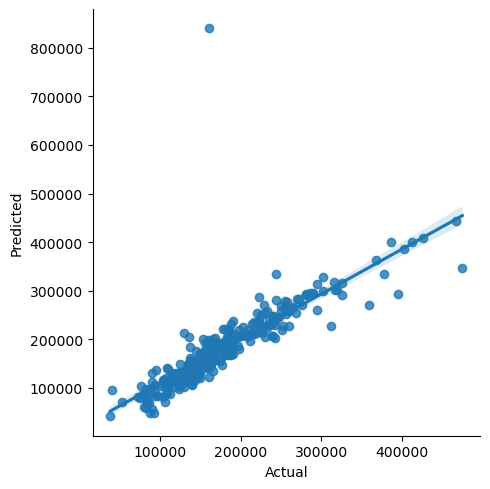

In [135]:
sns.lmplot(data=df1,x="Actual",y="Predicted")

# Lasso

In [136]:
lasso.fit(bx_train,by_train)

Lasso()

In [137]:
p2=lasso.predict(bx_test)
#p2

In [138]:
#lasso.coef_

In [139]:
df2=pd.DataFrame({"Importances":list(lasso.coef_),"Columns":list(x)})
df2

Importances                    Columns
0       0.958706                         Id
1     -62.790620             Building_Class
2    -918.226307               Zoning_Class
3      27.974069                 Lot_Extent
4       0.465079                   Lot_Size
5   30769.421059                  Road_Type
6    -808.998086             Property_Shape
7     839.043704               Land_Outline
8  -35068.305554               Utility_Type
9    -340.025848          Lot_Configuration
10   1079.713958             Property_Slope
11    309.610261               Neighborhood
12  -1705.877830                 Condition1
13 -11780.611787                 Condition2
14  -2587.884506                 House_Type
15   -607.343957               House_Design
16   9350.277791           Overall_Material
17   5647.623100            House_Condition
18    253.928694          Construction_Year
19      6.644557               Remodel_Year
20    328.577743                Roof_Design
21   4379.102843               Roof_Quality
22   -551.357067                Exterior1st
23    113.069463                Exterior2nd
24     26.497223          Brick_Veneer_Area
25  -7980.061547          Exterior_Material
26   -164.442571         Exterior_Condition
27   1268.108584            Foundation_Type
28  -9619.896456            Basement_Height
29   1701.479039         Basement_Condition
30  -3044.691168             Exposure_Level
31  -3523.253545               BsmtFinType1
32     32.152398                 BsmtFinSF1
33   3907.769029               BsmtFinType2
34     21.175709                 BsmtFinSF2
35      9.068846                  BsmtUnfSF
36     16.485012        Total_Basement_Area
37  -5988.632457               Heating_Type
38  -1024.676452            Heating_Quality
39  -2950.517742           Air_Conditioning
40   -457.618005          Electrical_System
41     40.517023           First_Floor_Area
42     50.281442          Second_Floor_Area
43    -17.190230               LowQualFinSF
44      6.727644          Grade_Living_Area
45    439.406187  Underground_Full_Bathroom
46  -3572.835849  Underground_Half_Bathroom
47     -0.000000  Full_Bathroom_Above_Grade
48    431.479472  Half_Bathroom_Above_Grade
49  -5509.577531        Bedroom_Above_Grade
50 -17467.377324        Kitchen_Above_Grade
51  -7121.555751            Kitchen_Quality
52   2416.632403          Rooms_Above_Grade
53   2309.278562            Functional_Rate
54   3657.217335                 Fireplaces
55  -2592.811863          Fireplace_Quality
56   1175.707056                     Garage
57    -13.947028          Garage_Built_Year
58  -1525.263031         Garage_Finish_Year
59   7467.669509                Garage_Size
60      3.123587                Garage_Area
61   1156.573200             Garage_Quality
62  -2549.150023           Garage_Condition
63   1118.857444               Pavedd_Drive
64     -6.582766                W_Deck_Area
65      8.544918            Open_Lobby_Area
66     21.285313        Enclosed_Lobby_Area
67     23.319325    Three_Season_Lobby_Area
68     25.191648          Screen_Lobby_Area
69     71.104726                  Pool_Area
70     -0.102612        Miscellaneous_Value
71   -240.582774                 Month_Sold
72   -331.405077                  Year_Sold
73   -717.623167                  Sale_Type
74   3273.229294             Sale_Condition

In [140]:
lr2=lasso.score(bx_train,by_train)
lr2

0.8768757321395115

In [141]:
adjlr2=1-(((1-lr2)*(1167-1))/(1167-75-1))
adjlr2

0.8684116440647759

In [142]:
result=pd.DataFrame({"actual":by_test,"predicted":p2})
result

actual      predicted
666   129000  212592.933880
104   169500  179806.126803
528    86000   68080.978064
18    159000  148049.913190
1151  149900  169925.136775
60    158000  178835.729899
70    244000  334199.816546
284   179200  187906.455305
860   189950  169361.393193
327   145250  153290.521446
786   139000  156681.498924
191   184000  194997.415405
218   311500  227438.790244
1276  162000  143005.885122
713   129000  101005.015064
1215  125000  102949.870803
621   240000  248594.954827
1054  255000  266347.521413
596   114504  130303.921250
622   135000  130481.940542
1384  105000  115507.452463
161   412500  400429.047793
1141  197500  179189.319178
0     208500  219541.627327
1337   52500   71221.712971
90    109900   98916.445049
1202  117000  124883.150947
482   155000  191589.598831
1292  107500  120667.013071
194   127000  116321.492778
1224  184000  221119.102495
1406  133000  135445.302928
1250  244000  281469.478273
534   178000  220278.308381
899   135000  131244.808013
835   128000  120272.209031
1228  367294  362275.721362
360   156000  159042.316950
515   402861  385478.775101
2     223500  216284.031967
781   175900  186979.473516
1317  208900  206264.930250
501   226700  212056.644409
1331  132500  123066.234904
109   190000  237978.547081
81    153500  199582.842292
1185  104900  111274.635554
1096  127000  119081.899242
569   135960  142294.542094
968    37900   41032.034133
956   124000  119205.015718
862   152000  149082.628478
942   150000  120424.732147
543   133000  137205.855841
492   172785  174986.604636
1039   80000   60075.400545
1131   93500  104951.749926
142   166000  134447.683149
135   174000  187496.291878
1197  144000  157300.978510
909   174000  186141.629424
880   157000  171294.259863
532   107500   87790.366982
961   272000  281906.879345
731   187500  231091.381640
1253  294000  259367.218419
32    179900  220423.061012
55    180500  187531.553425
791   146800  152554.981120
1092  136500  160233.673062
1020  176000  161469.106904
1336  135000  149119.225958
992   187000  216673.999365
373   123000   96863.276304
520   106250   69618.355161
706   302000  298387.638959
509   124500  133034.029434
1086   83500   69117.107799
794   194500  207826.704849
1035   84000   72930.659163
847   133500  128652.983464
1390  235000  241255.201074
1254  165400  199473.037630
132   150750  148040.047145
1102  135000  131001.965597
162   220000  254375.169997
1152  230000  203781.915420
651   108000  109596.715597
367   165000  164835.459217
1199  148000  134674.313739
115   176000  192970.528603
774   395000  293285.359354
1084  187500  173212.652383
19    139000  108143.889804
693   108480   90126.781245
1180  250000  267732.167867
1284  169000  191968.301939
45    319900  301964.579220
1416  122500  123157.884252
752   217000  211567.026516
1345  108500   95599.259346
374   219500  213261.090883
1163  108959  139813.257286
1114  117000  117053.295842
1321   72500   80960.168998
843   141000  128286.025711
614    75500   78418.947823
765   264132  264015.933259
256   207500  207071.614741
172   239000  206729.226009
770   134900  133633.473278
1393  163000  146330.769422
929   222000  235394.069833
230   148000  132081.272963
783   165500  184164.831488
1014  119200  130438.483777
1031  197000  205401.408012
722   124500  103929.855430
976    85500   87954.701811
1420  179900  169415.070358
545   229000  269644.508215
187   135000  146415.358157
940   150900  172088.599578
1179   93000   88977.538033
134   180000  167869.439761
337   214000  230850.601024
99    128950  111310.278119
959   155000  177793.892516
44    141000  127572.572131
20    325300  316472.465446
1186   95000  135763.509325
583   325000  291140.374127
224   386250  400261.606959
934   242000  229662.550364
195   148500  145440.007906
823   139500  141635.276231
183   200000  205844.016102
587   137000  128307.195109
637    93000   83618.788971
1056  185850  215108.729841
389   426000  407302.080722
439   110000  138407.116770
58

In [143]:
mse1=metrics.mean_squared_error(by_test,p2)
mse1

2158193079.818842

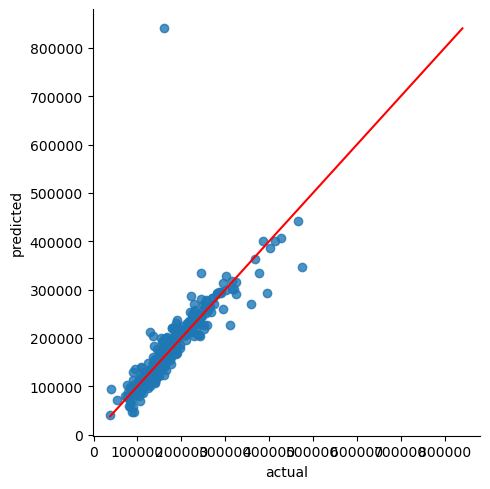

In [144]:
sns.lmplot(x="actual",y="predicted",data=result,fit_reg=False)
d_line=np.arange(result.min().min(),result.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")

# ridge

In [145]:
rd.fit(bx_train,by_train)

Ridge()

In [146]:
p3=rd.predict(bx_test)
#p3

In [147]:
#list(rd.coef_)

In [148]:
df3=pd.DataFrame({"Coeff":list(rd.coef_),"columns":list(x)})
#df3

In [149]:
rdr2=rd.score(bx_train,by_train)
rdr2

0.8768138428721661

In [150]:
rda_r2=1-(((1-rdr2)*(1167-1))/(1167-75-1))
rda_r2

0.8683455002648448

In [151]:
mse2=metrics.mean_squared_error(by_test,p3)
mse2

2160128390.8112407

In [152]:
l1=["Linear","Lasso","Ridge"]
l2=[r2,lr2,rdr2]
l3=[adj_r2,adjlr2,rda_r2]
l4=[mse,mse1,mse2]

In [153]:
final=pd.DataFrame({"Modelname":l1,"R-square":l2,"Adj-R2":l3,"MSE":l4})
final

Modelname  R-square    Adj-R2           MSE
0    Linear  0.876876  0.868412  2.157555e+09
1     Lasso  0.876876  0.868412  2.158193e+09
2     Ridge  0.876814  0.868346  2.160128e+09

# Random Forest

In [154]:
rf.fit(bx_train,by_train)

RandomForestRegressor()

In [155]:
rf_p=rf.predict(bx_test)

In [156]:
rf_r2=rf.score(bx_train,by_train)
rf_r2

0.980590553434344

In [157]:
rf_adjr2=1-(((1-rf_r2)*(1167-1)/(1167-75-1)))
rf_adjr2

0.9792562651736435

In [158]:
rf_MSE=metrics.mean_squared_error(by_test,rf_p)
rf_MSE

946920743.7977638

# XG Boosting

In [159]:
xgbr.fit(bx_train,by_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [160]:
p4=xgbr.predict(bx_test)

In [161]:
xgbr_r2=xgbr.score(bx_train,by_train)
xgbr_r2

0.9998868593042466

In [162]:
xgbr_adjr2=1-(((1-xgbr_r2)*(1167-1)/(1167-75-1)))
xgbr_adjr2

0.9998790815295614

In [163]:
xgbr_MSE=metrics.mean_squared_error(by_test,p4)
xgbr_MSE

717292702.2401137

In [164]:
fl1=["Linear","Lasso","Ridge","RF","XGB"]
fl2=[r2,lr2,rdr2,rf_r2,xgbr_r2]
fl3=[adj_r2,adjlr2,rda_r2,rf_adjr2,xgbr_adjr2]
fl4=[mse,mse1,mse2,rf_MSE,xgbr_MSE]

In [165]:
final1=pd.DataFrame({"Modelname":fl1,"R-square":fl2,"Adj-R2":fl3,"MSE":fl4})
final1

Modelname  R-square    Adj-R2           MSE
0    Linear  0.876876  0.868412  2.157555e+09
1     Lasso  0.876876  0.868412  2.158193e+09
2     Ridge  0.876814  0.868346  2.160128e+09
3        RF  0.980591  0.979256  9.469207e+08
4       XGB  0.999887  0.999879  7.172927e+08

# Outlier treatment

In [166]:
#data.head(10)

In [167]:
#data.tail(10)

In [168]:
#data.skew()

<Axes: >

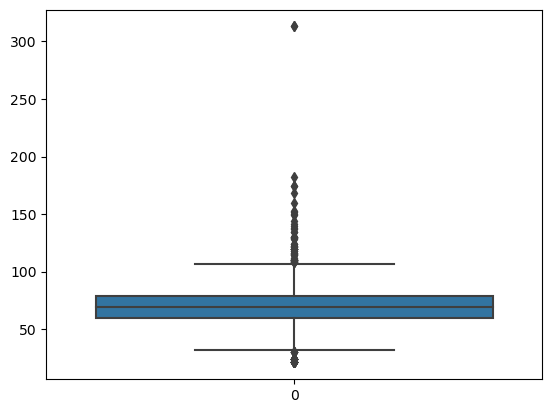

In [169]:
sns.boxplot(data["Lot_Extent"])

<Axes: xlabel='Lot_Extent', ylabel='Density'>

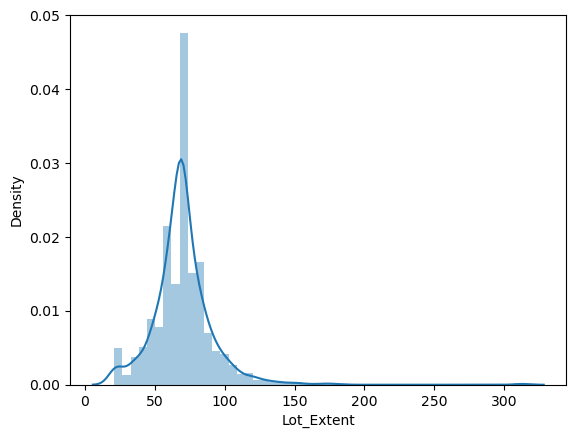

In [170]:
sns.distplot(data["Lot_Extent"])# right skewed - positively skewed 

In [171]:
IQR=data["Lot_Extent"].quantile(0.75)-data["Lot_Extent"].quantile(0.25)
IQR

19.0

In [172]:
lb1=data["Lot_Extent"].quantile(0.25)-(IQR*1.5)
ub1=data["Lot_Extent"].quantile(0.75)+(IQR*1.5)
print(lb1,ub1)

31.5 107.5


In [173]:
data.loc[data["Lot_Extent"]<31.5,"Lot_Extent"]=31.5
data.loc[data["Lot_Extent"]>107.5,"Lot_Extent"]=107.5

<Axes: >

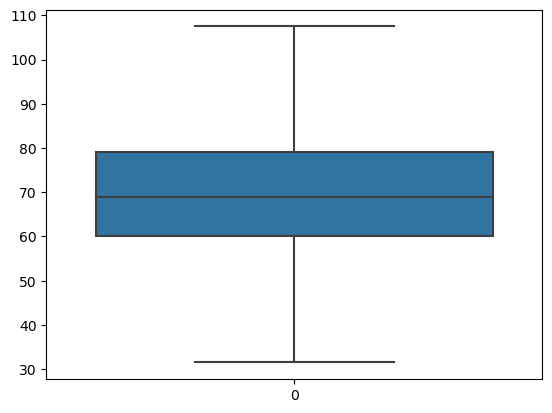

In [174]:
sns.boxplot(data["Lot_Extent"])

<Axes: xlabel='Lot_Extent', ylabel='Density'>

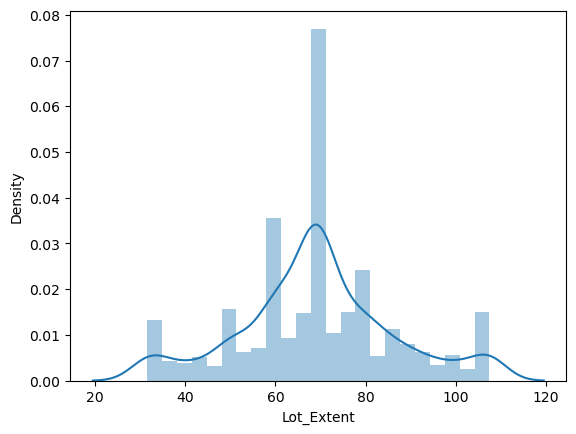

In [175]:
sns.distplot(data["Lot_Extent"])

<Axes: >

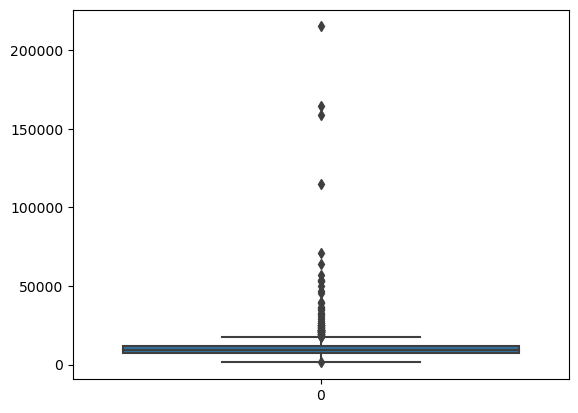

In [176]:
sns.boxplot(data["Lot_Size"])

<Axes: xlabel='Lot_Size', ylabel='Density'>

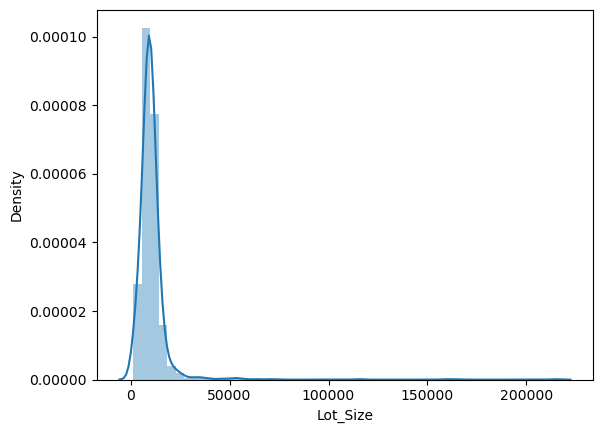

In [177]:
sns.distplot(data["Lot_Size"])

In [178]:
IQR=data["Lot_Size"].quantile(0.75)-data["Lot_Size"].quantile(0.25)
IQR

4054.0

In [179]:
lb3=data["Lot_Size"].quantile(0.25)-(IQR*3)
ub3=data["Lot_Size"].quantile(0.75)+(IQR*3)
print(lb3,ub3)

-4613.0 23765.0


In [180]:
data.loc[data["Lot_Size"]>23765.0,"Lot_Size"]=23765.0
data.loc[data["Lot_Size"]<-4613.0,"Lot_Size"]=-4613.0

<Axes: >

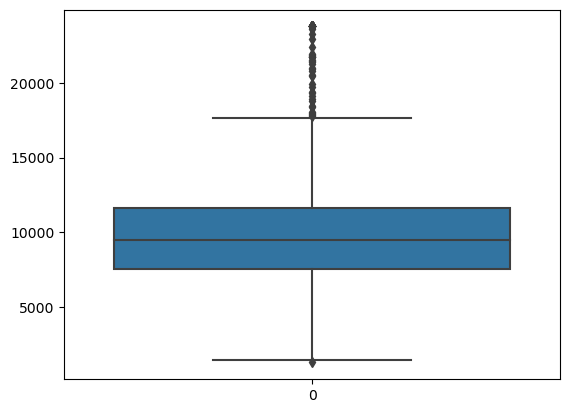

In [181]:
sns.boxplot(data["Lot_Size"])

<Axes: xlabel='Lot_Size', ylabel='Density'>

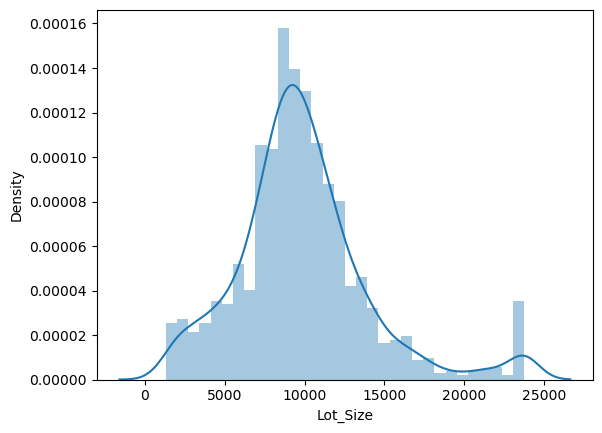

In [182]:
sns.distplot(data["Lot_Size"])

<Axes: >

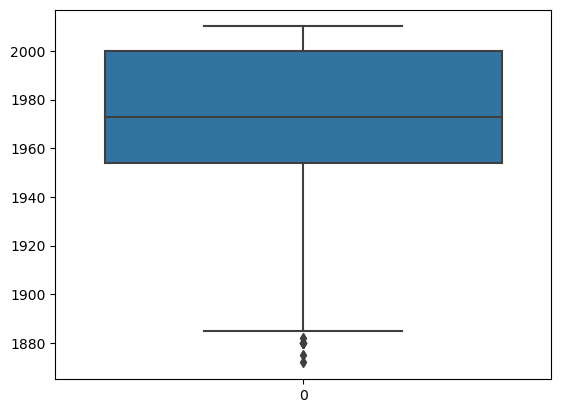

In [183]:
sns.boxplot(data["Construction_Year"])

<Axes: xlabel='Construction_Year', ylabel='Density'>

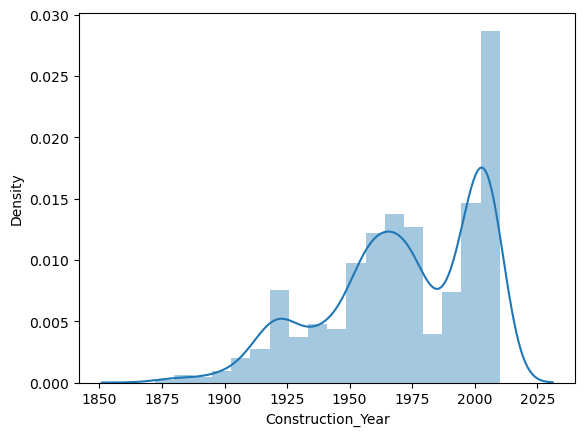

In [184]:
sns.distplot(data["Construction_Year"])

In [185]:
IQR=data["Construction_Year"].quantile(0.75)-data["Construction_Year"].quantile(0.25)
IQR

46.0

In [186]:
lb4=data["Construction_Year"].quantile(0.25)-(IQR*3)
ub4=data["Construction_Year"].quantile(0.75)+(IQR*3)
print(lb4,ub4)

1816.0 2138.0


In [187]:
data.loc[data["Construction_Year"]<1816.0,"Construction_Year"]=1816.0

<Axes: >

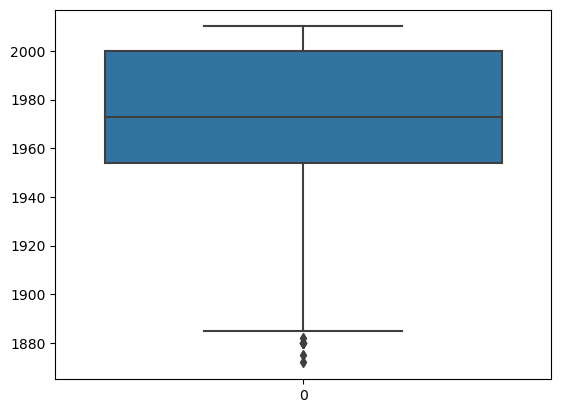

In [188]:
sns.boxplot(data["Construction_Year"])

<Axes: xlabel='Construction_Year', ylabel='Density'>

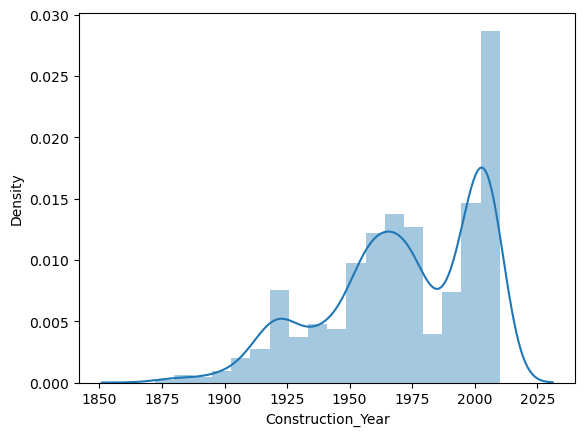

In [189]:
sns.distplot(data["Construction_Year"])

<Axes: >

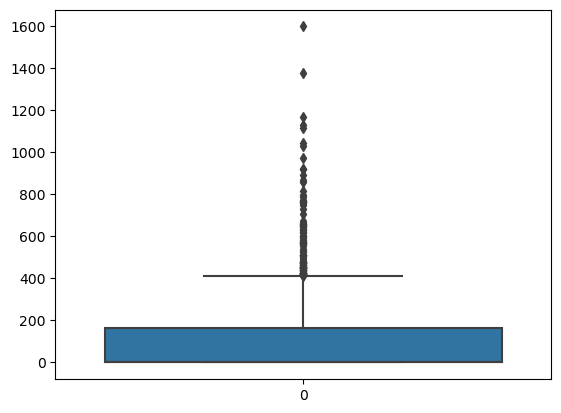

In [190]:
sns.boxplot(data["Brick_Veneer_Area"])

<Axes: xlabel='Brick_Veneer_Area', ylabel='Density'>

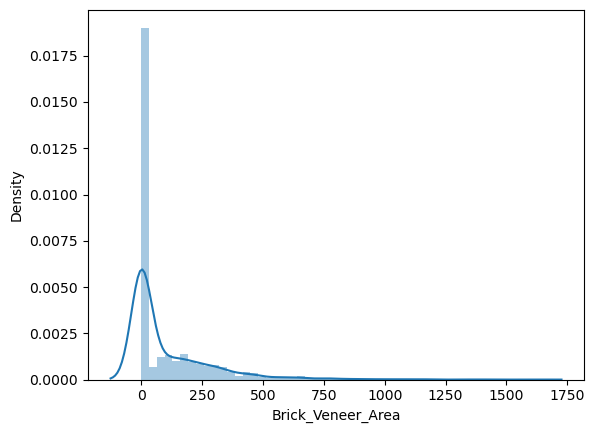

In [191]:
sns.distplot(data["Brick_Veneer_Area"])

In [192]:
IQR=data["Brick_Veneer_Area"].quantile(0.75)-data["Brick_Veneer_Area"].quantile(0.25)
IQR

164.5

In [193]:
lb5=data["Brick_Veneer_Area"].quantile(0.25)-(IQR*3)
ub5=data["Brick_Veneer_Area"].quantile(0.75)+(IQR*3)
print(lb5,ub5)

-493.5 658.0


In [194]:
data.loc[data["Brick_Veneer_Area"]>658.0,"Brick_Veneer_Area"]=658.0

<Axes: >

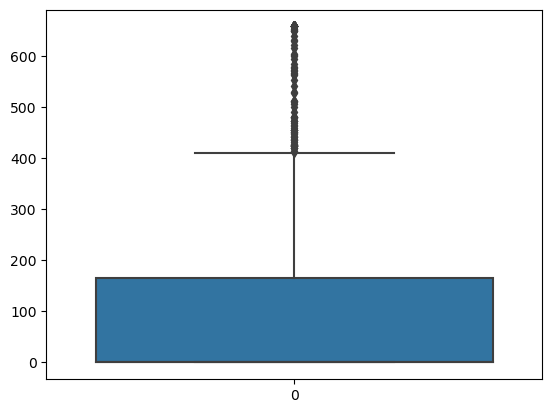

In [195]:
sns.boxplot(data["Brick_Veneer_Area"])

<Axes: xlabel='Brick_Veneer_Area', ylabel='Density'>

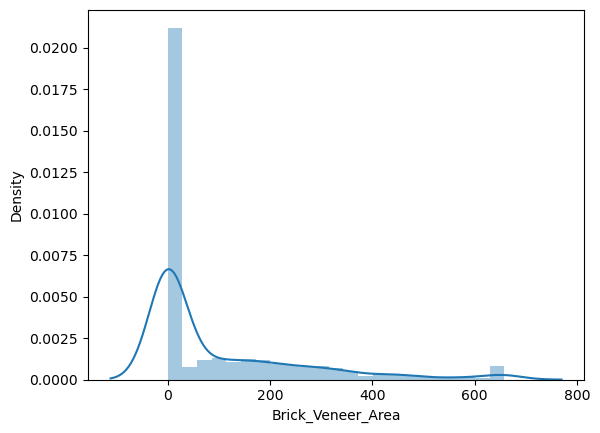

In [196]:
sns.distplot(data["Brick_Veneer_Area"])

<Axes: >

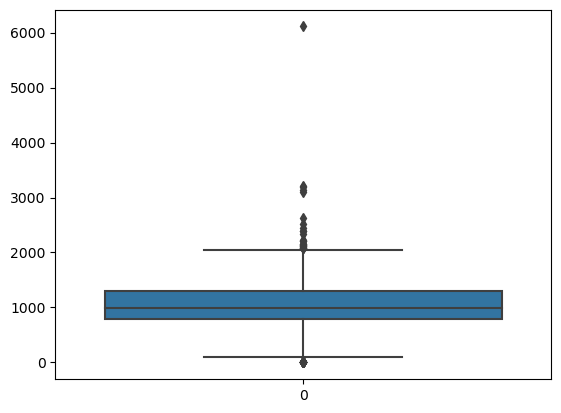

In [197]:
sns.boxplot(data["Total_Basement_Area"])

<Axes: xlabel='Total_Basement_Area', ylabel='Density'>

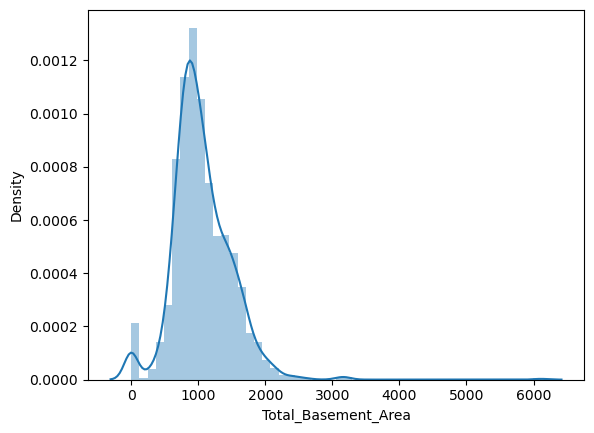

In [198]:
sns.distplot(data["Total_Basement_Area"])

In [199]:
IQR=data["Total_Basement_Area"].quantile(0.75)-data["Total_Basement_Area"].quantile(0.25)
IQR

503.0

In [200]:
lb6=data["Total_Basement_Area"].quantile(0.25)-(IQR*3)
ub6=data["Total_Basement_Area"].quantile(0.75)+(IQR*3)
print(lb6,ub6)

-713.5 2807.5


In [201]:
data.loc[data["Total_Basement_Area"]>2807.5,"Total_Basement_Area"]=2807.5
data.loc[data["Total_Basement_Area"]<-713.5,"Total_Basement_Area"]=-713.5

<Axes: >

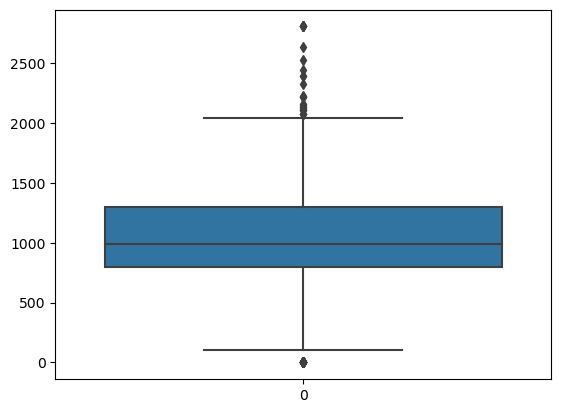

In [202]:
sns.boxplot(data["Total_Basement_Area"])

<Axes: xlabel='Total_Basement_Area', ylabel='Density'>

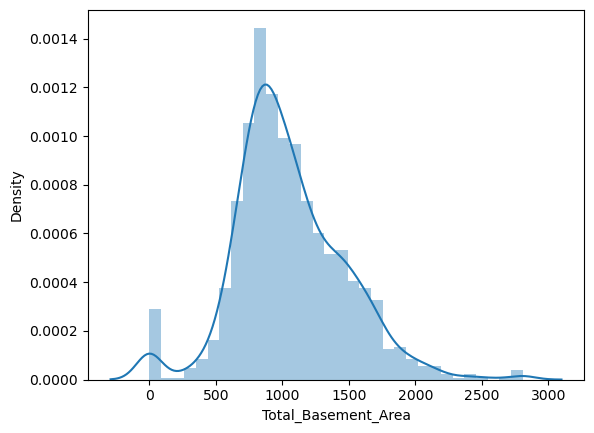

In [203]:
sns.distplot(data["Total_Basement_Area"])

<Axes: >

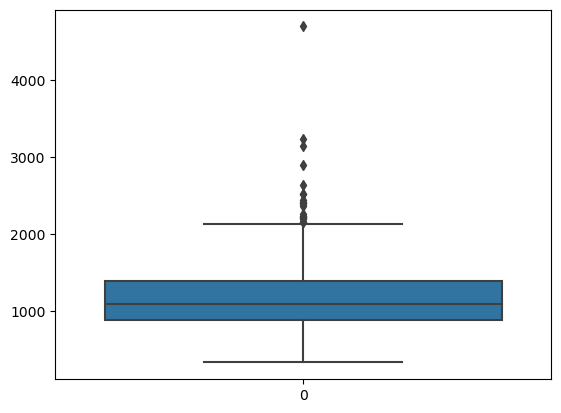

In [204]:
sns.boxplot(data["First_Floor_Area"])

<Axes: xlabel='First_Floor_Area', ylabel='Density'>

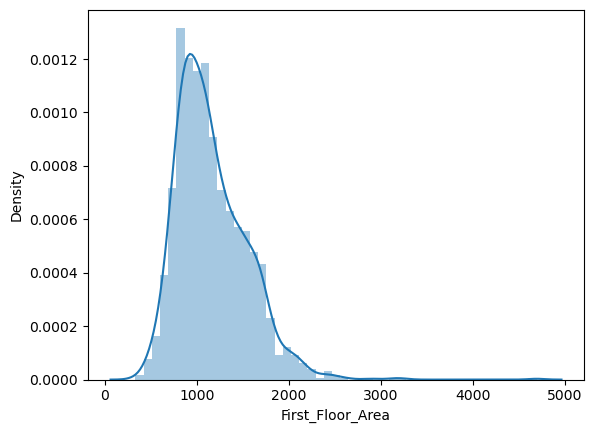

In [205]:
sns.distplot(data["First_Floor_Area"])

In [206]:
IQR=data["First_Floor_Area"].quantile(0.75)-data["First_Floor_Area"].quantile(0.25)
IQR

509.5

In [207]:
lb7=data["First_Floor_Area"].quantile(0.25)-(IQR*3)
ub7=data["First_Floor_Area"].quantile(0.75)+(IQR*3)
print(lb7,ub7)

-646.5 2920.0


In [208]:
data.loc[data["First_Floor_Area"]>2920.0,"First_Floor_Area"]=2920.0

<Axes: >

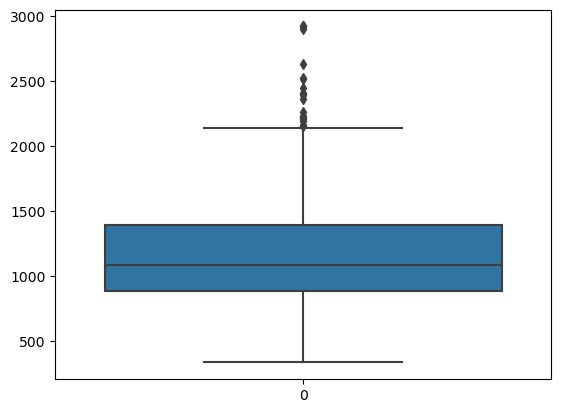

In [209]:
sns.boxplot(data["First_Floor_Area"])

<Axes: xlabel='First_Floor_Area', ylabel='Density'>

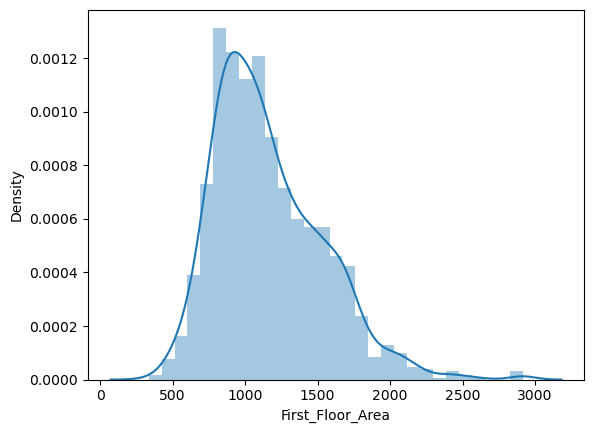

In [210]:
sns.distplot(data["First_Floor_Area"])

<Axes: >

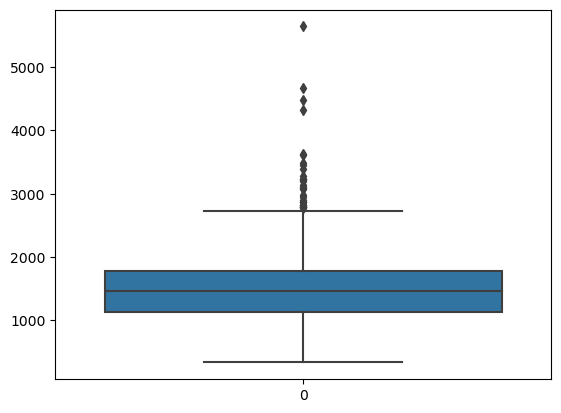

In [211]:
sns.boxplot(data["Grade_Living_Area"])

<Axes: xlabel='Grade_Living_Area', ylabel='Density'>

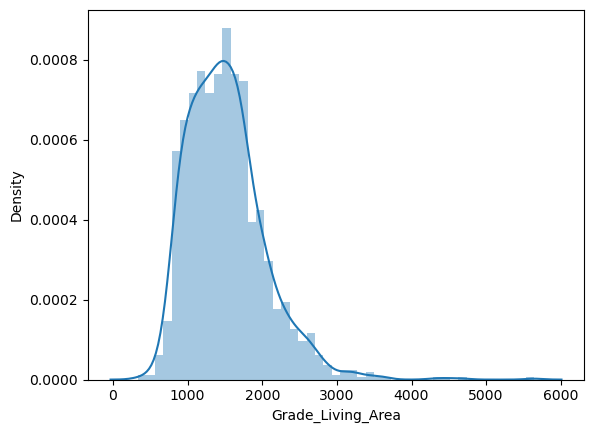

In [212]:
sns.distplot(data["Grade_Living_Area"])

In [213]:
IQR=data["Grade_Living_Area"].quantile(0.75)-data["Grade_Living_Area"].quantile(0.25)
IQR

648.5

In [214]:
lb9=data["Grade_Living_Area"].quantile(0.25)-(IQR*3)
ub9=data["Grade_Living_Area"].quantile(0.75)+(IQR*3)
print(lb9,ub9)

-816.5 3723.0


In [215]:
data.loc[data["Grade_Living_Area"]>3723.0,"Grade_Living_Area"]=3723.0

<Axes: >

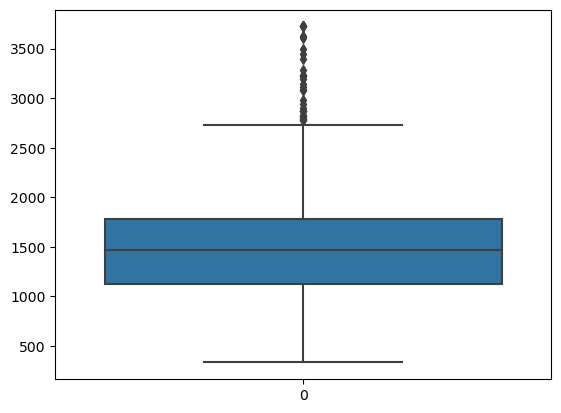

In [216]:
sns.boxplot(data["Grade_Living_Area"])

<Axes: xlabel='Grade_Living_Area', ylabel='Density'>

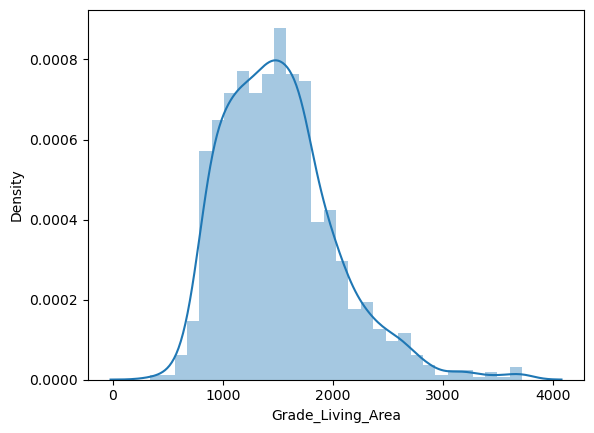

In [217]:
sns.distplot(data["Grade_Living_Area"])

<Axes: >

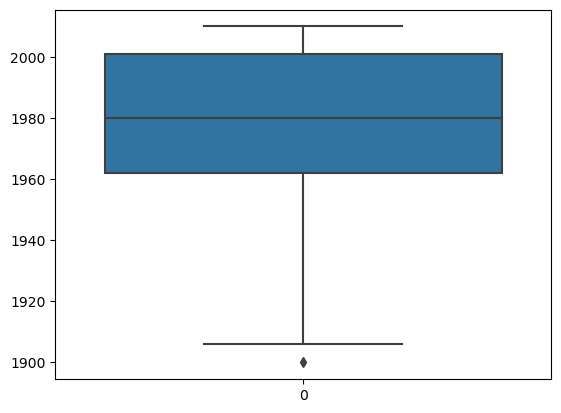

In [218]:
sns.boxplot(data["Garage_Built_Year"])

<Axes: xlabel='Garage_Built_Year', ylabel='Density'>

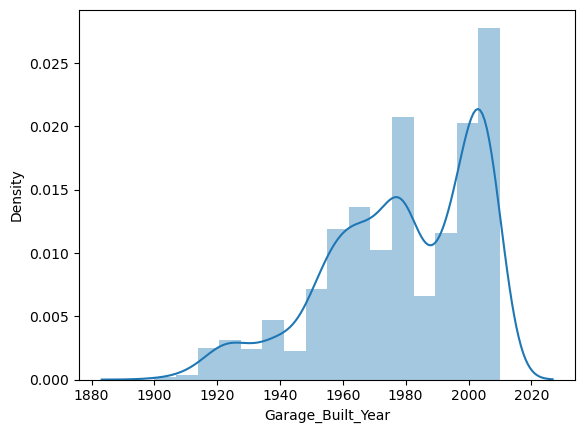

In [219]:
sns.distplot(data["Garage_Built_Year"])

In [220]:
IQR=data["Garage_Built_Year"].quantile(0.75)-data["Garage_Built_Year"].quantile(0.25)
IQR

39.0

In [221]:
lb10=data["Garage_Built_Year"].quantile(0.25)-(IQR*3)
ub10=data["Garage_Built_Year"].quantile(0.75)+(IQR*3)
print(lb10,ub10)

1845.0 2118.0


In [222]:
data.loc[data["Garage_Built_Year"]<1845.0,"Garage_Built_Year"]=1845.0

<Axes: >

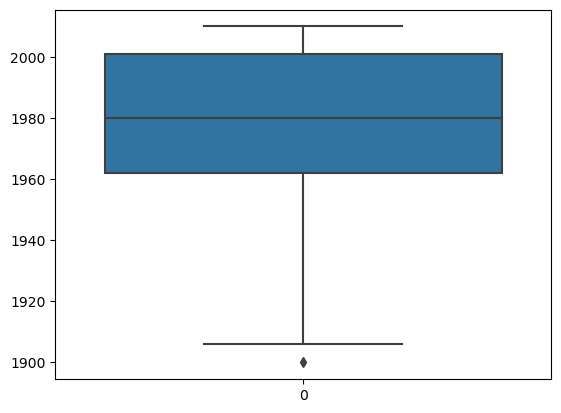

In [223]:
sns.boxplot(data["Garage_Built_Year"])

<Axes: xlabel='Garage_Built_Year', ylabel='Density'>

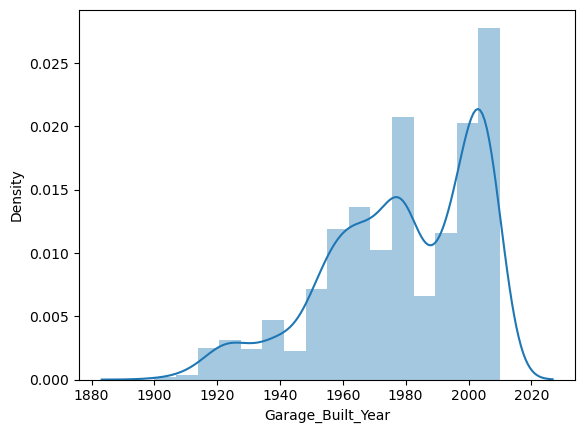

In [224]:
sns.distplot(data["Garage_Built_Year"])

<Axes: >

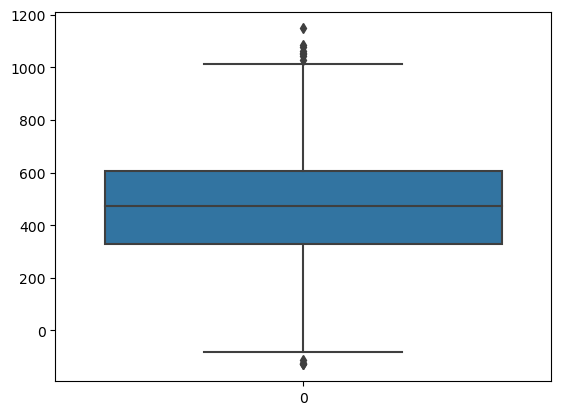

In [225]:
sns.boxplot(data["Garage_Area"])

<Axes: xlabel='Garage_Area', ylabel='Density'>

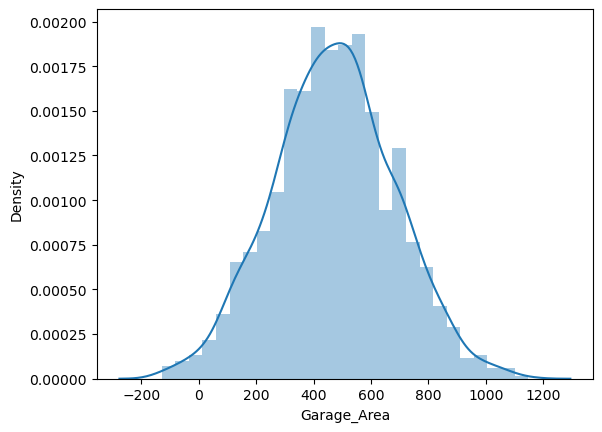

In [226]:
sns.distplot(data["Garage_Area"])

In [227]:
up=data["Garage_Area"].mean()+2.5*data["Garage_Area"].std()
lp=data["Garage_Area"].mean()-2.5*data["Garage_Area"].std()
print(up,lp)

997.6067556677933 -55.737181446729664


In [228]:
data.loc[data["Garage_Area"]>997.60675,"Garage_Area"]=997.60675
data.loc[data["Garage_Area"]<-55.73718,"Garage_Area"]=-55.73718

<Axes: >

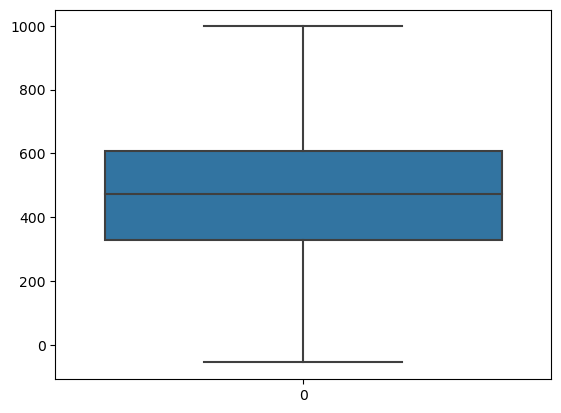

In [229]:
sns.boxplot(data["Garage_Area"])

<Axes: xlabel='Garage_Area', ylabel='Density'>

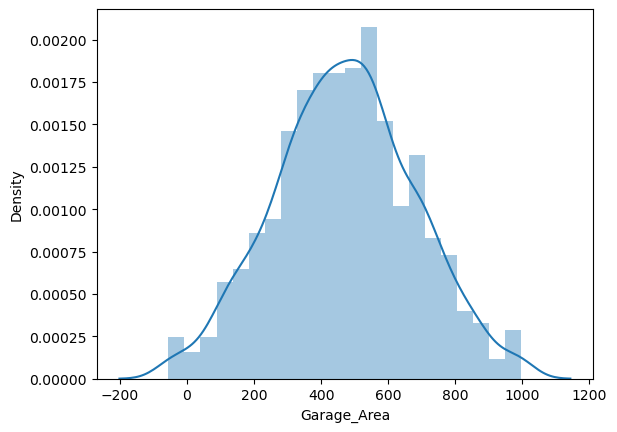

In [230]:
sns.distplot(data["Garage_Area"])

<Axes: >

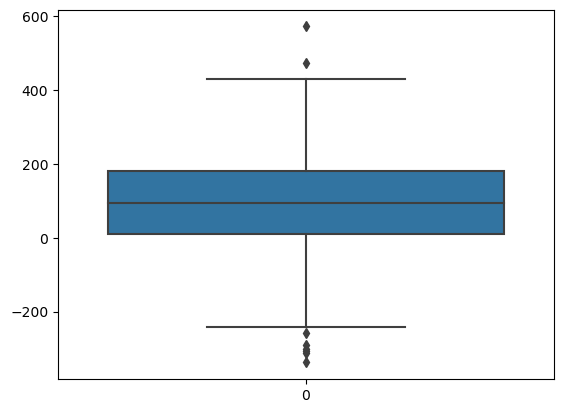

In [231]:
sns.boxplot(data["W_Deck_Area"])

<Axes: xlabel='W_Deck_Area', ylabel='Density'>

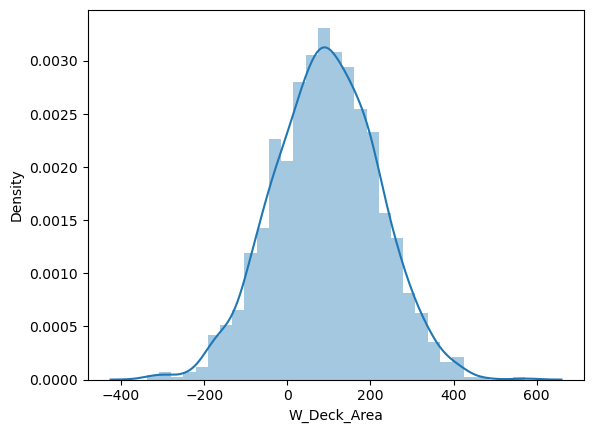

In [232]:
sns.distplot(data["W_Deck_Area"])

In [233]:
up1=data["W_Deck_Area"].mean()+2.5*data["W_Deck_Area"].std()
lp1=data["W_Deck_Area"].mean()-2.5*data["W_Deck_Area"].std()
print(up1,lp1)

405.00737163557943 -218.9760370854013


In [234]:
data.loc[data["W_Deck_Area"]>405.00737,"W_Deck_Area"]=405.00737
data.loc[data["W_Deck_Area"]<-218.97603,"W_Deck_Area"]=-218.97603

<Axes: >

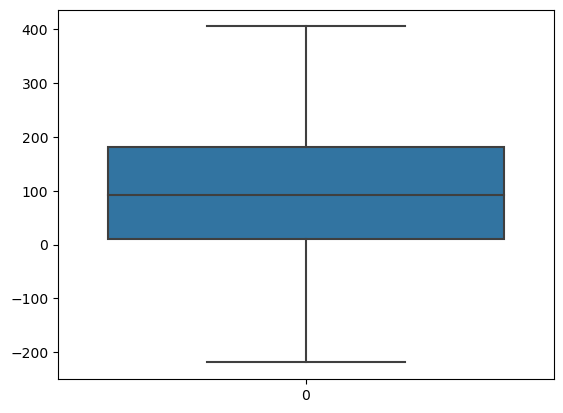

In [235]:
sns.boxplot(data["W_Deck_Area"])

<Axes: xlabel='W_Deck_Area', ylabel='Density'>

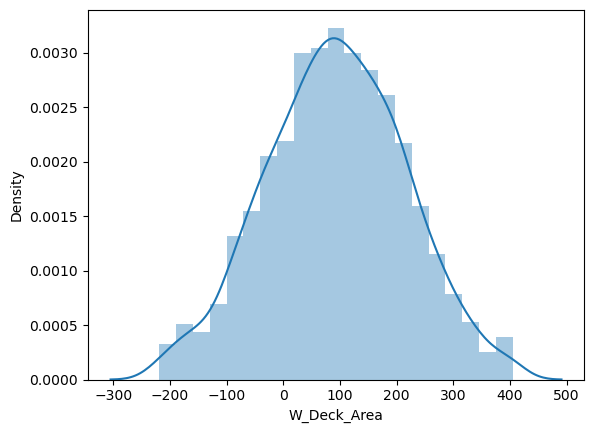

In [236]:
sns.distplot(data["W_Deck_Area"])

<Axes: >

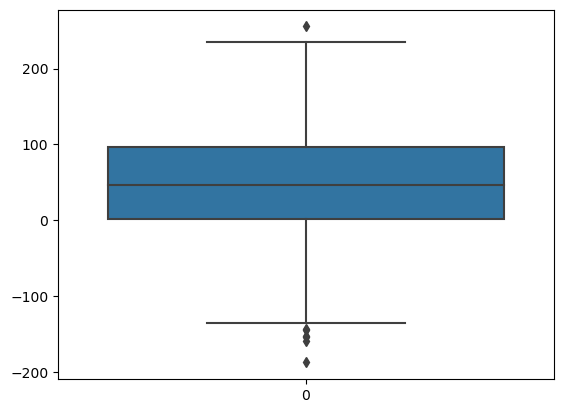

In [237]:
sns.boxplot(data["Open_Lobby_Area"])

<Axes: xlabel='Open_Lobby_Area', ylabel='Density'>

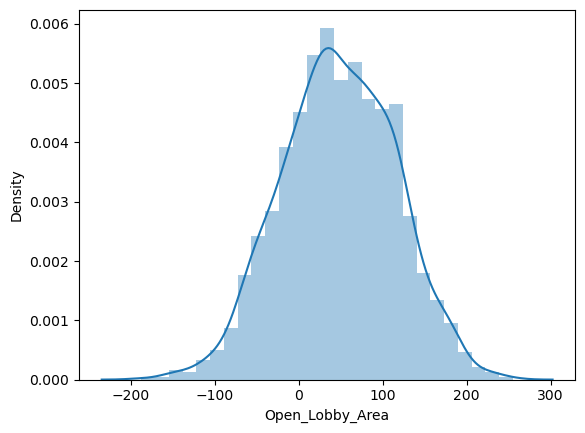

In [238]:
sns.distplot(data["Open_Lobby_Area"])

In [239]:
up2=data["Open_Lobby_Area"].mean()+2.5*data["Open_Lobby_Area"].std()
lp2=data["Open_Lobby_Area"].mean()-2.5*data["Open_Lobby_Area"].std()
print(up2,lp2)

216.4808669798213 -120.85706383539772


In [240]:
data.loc[data["Open_Lobby_Area"]>216.48086,"Open_Lobby_Area"]=216.48086
data.loc[data["Open_Lobby_Area"]<-120.85706,"Open_Lobby_Area"]=-120.85706

<Axes: >

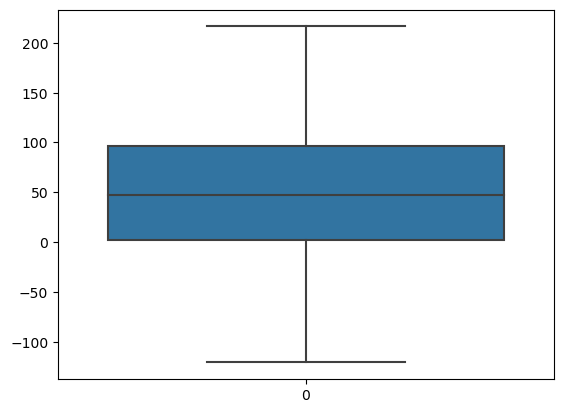

In [241]:
sns.boxplot(data["Open_Lobby_Area"])

<Axes: xlabel='Open_Lobby_Area', ylabel='Density'>

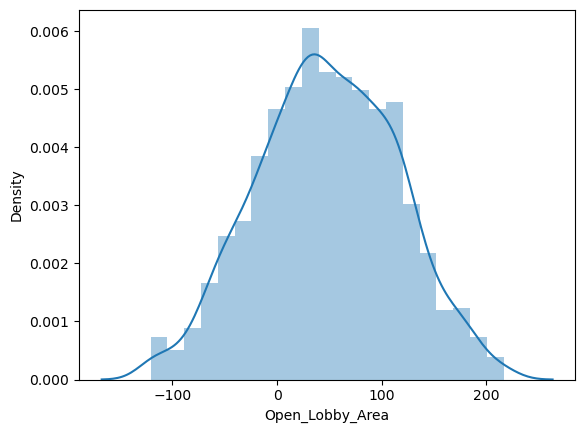

In [242]:
sns.distplot(data["Open_Lobby_Area"])

In [243]:
data.skew()

Id                            0.000000
Building_Class                1.406938
Zoning_Class                 -1.734900
Lot_Extent                    0.095101
Lot_Size                      0.995152
Road_Type                   -15.513399
Property_Shape               -0.609065
Land_Outline                 -3.161114
Utility_Type                 38.196859
Lot_Configuration            -1.134578
Property_Slope                4.811833
Neighborhood                  0.040800
Condition1                    3.018093
Condition2                   13.167290
House_Type                    2.244472
House_Design                  0.305735
Overall_Material              0.215719
House_Condition               0.693682
Construction_Year            -0.613700
Remodel_Year                 -0.505239
Roof_Design                   1.472729
Roof_Quality                  3.316535
Exterior1st                  -0.728360
Exterior2nd                  -0.695057
Brick_Veneer_Area             1.814112
Exterior_Material        

In [244]:
#positive skwness-square root,cube root,log
#negative skwness-square transformation

In [245]:
np.sqrt(data["Brick_Veneer_Area"])
np.sqrt(data["LowQualFinSF"])
np.sqrt(data["Three_Season_Lobby_Area"])
np.sqrt(data["Screen_Lobby_Area"])
np.sqrt(data["Pool_Area"])
np.sqrt(data["Miscellaneous_Value"])

np.cbrt(data["Construction_Year"])
np.cbrt(data["Remodel_Year"])
np.cbrt(data["Basement_Height"])
np.cbrt(data["Functional_Rate"])
np.cbrt(data["Garage_Built_Year"])
np.cbrt(data["Garage_Size"])
np.cbrt(data["W_Deck_Area"])
np.cbrt(data["Open_Lobby_Area"])
np.cbrt(data["Enclosed_Lobby_Area"])

0       2.729621
1       2.468369
2      -3.589067
3       3.934815
4       2.793045
5       4.128150
6      -1.918800
7       4.252920
8       4.282917
9       3.865477
10      3.123662
11      4.702530
12      2.698692
13      4.219522
14      4.644773
15     -3.887763
16      4.926147
17     -2.377186
18     -2.735451
19      3.614116
20      3.735776
21     -2.686632
22      1.787200
23      5.136305
24      2.531992
25      1.357579
26     -2.447844
27      4.766451
28      3.130120
29      4.487538
30      4.578071
31     -5.003064
32      4.256461
33     -1.085125
34      3.870972
35      4.018730
36     -3.689938
37      3.476576
38      3.837868
39      5.627670
40      5.029693
41     -3.886229
42      4.120210
43     -1.337027
44     -3.287635
45     -3.415453
46      1.535482
47     -2.548878
48      4.486966
49      2.948192
50     -4.548261
51     -2.735037
52      2.820662
53     -1.475522
54      3.827756
55      5.134930
56     -3.240041
57      2.241492
58     -3.5322

In [246]:
#data.skew()

# Model building

In [247]:
x1=data.iloc[:,1:-1]
y1=data.iloc[:,-1]

In [248]:
bx1_train,bx1_test,by1_train,by1_test=train_test_split(x1,y1,test_size=0.2,random_state=101)

In [249]:
bx1_train.shape,bx1_test.shape,by1_train.shape,by1_test.shape

((1167, 74), (292, 74), (1167,), (292,))

# Linear

In [250]:
lin.fit(bx1_train,by1_train)

LinearRegression()

In [251]:
LR_p=lin.predict(bx1_test)

In [252]:
lin.intercept_

-40933.12905024961

In [253]:
LR_r2=lin.score(bx1_train,by1_train)
LR_r2

0.8788563756682304

In [254]:
LR_adjr2=1-(((1-LR_r2)*(1167-1))/(1167-74-1))
LR_adjr2

0.8706470091842093

In [255]:
LR_mse=metrics.mean_squared_error(by1_test,LR_p)
LR_mse

584944792.7702386

In [256]:
LR_df=pd.DataFrame({"Actual":by1_test,"Predicted":LR_p})
#LR_df

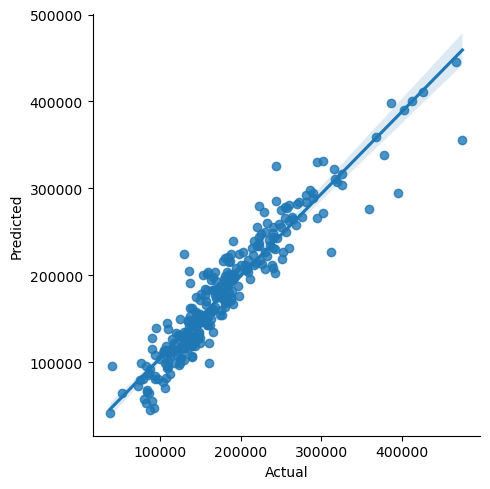

In [257]:
sns.lmplot(data=LR_df,x="Actual",y="Predicted")

# Lasso

In [258]:
lasso.fit(bx1_train,by1_train)

Lasso()

In [259]:
L_p=lasso.predict(bx1_test)
#L_p

In [260]:
ldf=pd.DataFrame({"Importances":list(lasso.coef_),"Columns":list(x1)})
#ldf

In [261]:
L_r2=lasso.score(bx1_train,by1_train)
L_r2

0.878637430060803

In [262]:
L_adjr2=1-(((1-L_r2)*(1167-1))/(1167-74-1))
L_adjr2

0.8704132266033848

In [263]:
L_df=pd.DataFrame({"Actual":by1_test,"Predicted":L_p})
#L_df

In [264]:
L_mse=metrics.mean_squared_error(by1_test,L_p)
L_mse

635008002.366734

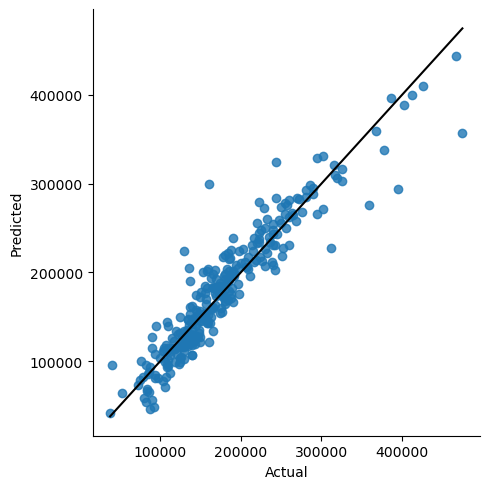

In [265]:
sns.lmplot(x="Actual",y="Predicted",data=L_df,fit_reg=False)
d_line=np.arange(L_df.min().min(),L_df.max().max())
plt.plot(d_line,d_line,color="black",linestyle="-")

# Ridge

In [266]:
rd.fit(bx1_train,by1_train)

Ridge()

In [267]:
RD_p=rd.predict(bx1_test)

In [268]:
rdf=pd.DataFrame({"Coeff":list(rd.coef_),"columns":list(x1)})
#rdf

In [269]:
RD_r2=rd.score(bx1_train,by1_train)
RD_r2

0.8788114759300949

In [270]:
RD_ar2=1-(((1-RD_r2)*(1167-1))/(1167-74-1))
RD_ar2

0.8705990667898266

In [271]:
R_mse=metrics.mean_squared_error(by1_test,RD_p)
R_mse

585589594.5311989

In [272]:
R_df=pd.DataFrame({"Actual":by1_test,"Predicted":RD_p})
#R_df

# Random Forest Regressor

In [273]:
rf.fit(bx1_train,by1_train)

RandomForestRegressor()

In [274]:
RF_p=rf.predict(bx1_test)

In [275]:
RF_r2=rf.score(bx1_train,by1_train)
RF_r2

0.9783377285951904

In [276]:
bx1_train.shape

(1167, 74)

In [277]:
RF_adjr2=1-(((1-RF_r2)*(1167-1)/(1167-74-1)))
RF_adjr2

0.9768697724743517

In [278]:
RF_MSE=metrics.mean_squared_error(by_test,RF_p)
RF_MSE

896140563.8909777

# XGB

In [279]:
xgbr.fit(bx1_train,by1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [280]:
XGB_p=xgbr.predict(bx1_test)

In [281]:
XGB_r2=xgbr.score(bx1_train,by1_train)
XGB_r2

0.9998865677272661

In [282]:
XGB_adjr2=1-(((1-XGB_r2)*(1167-1)/(1167-74-1)))
XGB_adjr2

0.9998788809249014

In [283]:
XGB_MSE=metrics.mean_squared_error(by1_test,XGB_p)
XGB_MSE

623310480.4734323

In [284]:
L1=["Linear","Lasso","Ridge","RF regressor","XGB"]
L2=[LR_r2,L_r2,RD_r2,RF_r2,XGB_r2]
L3=[LR_adjr2,L_adjr2,RD_ar2,RF_adjr2,XGB_adjr2]
L4=[LR_mse,L_mse,R_mse,RF_MSE,XGB_MSE]

In [285]:
Final=pd.DataFrame({"Modelname":L1,"R-square":L2,"Adj-R2":L3,"MSE":L4})
Final

Modelname  R-square    Adj-R2           MSE
0        Linear  0.878856  0.870647  5.849448e+08
1         Lasso  0.878637  0.870413  6.350080e+08
2         Ridge  0.878811  0.870599  5.855896e+08
3  RF regressor  0.978338  0.976870  8.961406e+08
4           XGB  0.999887  0.999879  6.233105e+08

# Feature Selection

In [286]:
data.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type',
       'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1',
       'Condition2', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom

In [287]:
dtf=pd.DataFrame({"Importances":list(lasso.coef_),"Columns":list(x1)})
dtf

Importances                    Columns
0     -46.421979             Building_Class
1    -536.703920               Zoning_Class
2     -13.147257                 Lot_Extent
3       1.370624                   Lot_Size
4   25017.692663                  Road_Type
5    -561.070099             Property_Shape
6     627.038063               Land_Outline
7  -30423.449459               Utility_Type
8     -78.835435          Lot_Configuration
9    3366.443981             Property_Slope
10    308.176019               Neighborhood
11  -1981.305088                 Condition1
12 -10698.780589                 Condition2
13  -2142.245850                 House_Type
14   -582.842277               House_Design
15   9263.841142           Overall_Material
16   5970.316129            House_Condition
17    251.315858          Construction_Year
18      0.825659               Remodel_Year
19    655.066329                Roof_Design
20   4775.163366               Roof_Quality
21   -486.869926                Exterior1st
22    -65.110242                Exterior2nd
23     19.621451          Brick_Veneer_Area
24  -8301.474892          Exterior_Material
25    -61.892987         Exterior_Condition
26   1668.799096            Foundation_Type
27  -9877.516771            Basement_Height
28   1805.616269         Basement_Condition
29  -2647.075469             Exposure_Level
30  11712.306600               BsmtFinType1
31    -83.742306                 BsmtFinSF1
32 -11389.337314               BsmtFinType2
33    -94.463359                 BsmtFinSF2
34   -107.385052                  BsmtUnfSF
35    137.343289        Total_Basement_Area
36  -5047.260328               Heating_Type
37   -970.348763            Heating_Quality
38  -2592.795931           Air_Conditioning
39   -457.390078          Electrical_System
40     17.691461           First_Floor_Area
41     29.352306          Second_Floor_Area
42    -47.086486               LowQualFinSF
43     31.489899          Grade_Living_Area
44    -49.938930  Underground_Full_Bathroom
45  -3843.160217  Underground_Half_Bathroom
46     13.655142  Full_Bathroom_Above_Grade
47   -299.188242  Half_Bathroom_Above_Grade
48  -5988.083852        Bedroom_Above_Grade
49 -18681.839512        Kitchen_Above_Grade
50  -6707.604956            Kitchen_Quality
51   1966.562230          Rooms_Above_Grade
52   2526.557017            Functional_Rate
53   2993.610319                 Fireplaces
54  -2570.857147          Fireplace_Quality
55   1593.159346                     Garage
56      7.949830          Garage_Built_Year
57  -1756.867289         Garage_Finish_Year
58   6501.365370                Garage_Size
59      2.324186                Garage_Area
60   1015.241947             Garage_Quality
61  -2617.726492           Garage_Condition
62   1602.654483               Pavedd_Drive
63     -6.551079                W_Deck_Area
64     11.386485            Open_Lobby_Area
65     21.990387        Enclosed_Lobby_Area
66     12.584491    Three_Season_Lobby_Area
67     19.373821          Screen_Lobby_Area
68     68.645405                  Pool_Area
69     -0.419206        Miscellaneous_Value
70   -185.568983                 Month_Sold
71   -237.285869                  Year_Sold
72   -618.696208                  Sale_Type
73   3190.157620             Sale_Condition

In [288]:
dt=data.drop(["Id","Remodel_Year","Miscellaneous_Value"],axis=1)

In [289]:
x2=dt.iloc[:,:-1]
y2=dt.iloc[:,-1]

In [290]:
x2_tr,x2_te,y2_tr,y2_te=train_test_split(x2,y2,test_size=0.2,random_state=101)

In [291]:
x2_tr.shape,x2_te.shape,y2_tr.shape,y2_te.shape

((1167, 72), (292, 72), (1167,), (292,))

In [292]:
lin.fit(x2_tr,y2_tr)

LinearRegression()

In [293]:
fs_p=lin.predict(x2_te)
#fs_p

In [294]:
lin.intercept_

-44256.87089282667

In [295]:
#lin.coef_

In [296]:
fs_R2=lin.score(x2_tr,y2_tr)
fs_R2

0.8788485223235453

In [297]:
fs_adj_R2=1-(((1-fs_R2)*(1167-1))/(1167-72-1))
fs_adj_R2

0.8708751161144916

In [298]:
fs_MSE=metrics.mean_squared_error(y2_te,fs_p)
fs_MSE

585006909.0474652

In [299]:
L11=["Linear","Lasso","Ridge","RF regressor","XGB","F_S"]
L22=[LR_r2,L_r2,RD_r2,RF_r2,XGB_r2,fs_R2]
L33=[LR_adjr2,L_adjr2,RD_ar2,RF_adjr2,XGB_adjr2,fs_adj_R2]
L44=[LR_mse,L_mse,R_mse,RF_MSE,XGB_MSE,fs_MSE]

In [300]:
Final1=pd.DataFrame({"Modelname":L11,"R-square":L22,"Adj-R2":L33,"MSE":L44})
Final1

Modelname  R-square    Adj-R2           MSE
0        Linear  0.878856  0.870647  5.849448e+08
1         Lasso  0.878637  0.870413  6.350080e+08
2         Ridge  0.878811  0.870599  5.855896e+08
3  RF regressor  0.978338  0.976870  8.961406e+08
4           XGB  0.999887  0.999879  6.233105e+08
5           F_S  0.878849  0.870875  5.850069e+08